In [1]:
spark.version

'3.1.3'

In [2]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [3]:
import time
import pandas as pd
from itertools import islice

In [4]:
from google.cloud import storage

In [5]:
def list_blobs(bucket_name, folder_name):
    """List all files in given COS directory."""    
    gcs_client = storage.Client()
    bucket = gcs_client.bucket(bucket_name)
    blobs = list(bucket.list_blobs(prefix=folder_name))
    for blob in blobs:
        print(blob.name + '\t' + str(blob.size))

In [6]:
def list_blobs_pd(bucket_name, folder_name):
    """List all files in given COS directory."""       
    gcs_client = storage.Client()
    bucket = gcs_client.bucket(bucket_name)
    blobs = list(bucket.list_blobs(prefix=folder_name))

    blob_name = []
    blob_size = []
    
    for blob in blobs:
        blob_name.append(blob.name)
        blob_size.append(blob.size)

    blobs_df = pd.DataFrame(list(zip(blob_name, blob_size)), columns=['Name','Size'])

    blobs_df = blobs_df.style.format({"Size": "{:,.0f}"}) 
    
    return blobs_df

## Loading the Parquet data into spark dataframe


In [7]:
commits_df = spark.read.parquet("gs://msca-bdp-data-open/final_project_git/commits/")
contents_df = spark.read.parquet("gs://msca-bdp-data-open/final_project_git/contents/")
files_df = spark.read.parquet("gs://msca-bdp-data-open/final_project_git/files/")
languages_df = spark.read.parquet("gs://msca-bdp-data-open/final_project_git/languages/")
licenses_df = spark.read.parquet("gs://msca-bdp-data-open/final_project_git/licenses/")

In [8]:
commits_df.printSchema()

root
 |-- commit: string (nullable = true)
 |-- tree: string (nullable = true)
 |-- parent: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- author: struct (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- email: string (nullable = true)
 |    |-- time_sec: long (nullable = true)
 |    |-- tz_offset: long (nullable = true)
 |    |-- date: struct (nullable = true)
 |    |    |-- seconds: long (nullable = true)
 |    |    |-- nanos: long (nullable = true)
 |-- committer: struct (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- email: string (nullable = true)
 |    |-- time_sec: long (nullable = true)
 |    |-- tz_offset: long (nullable = true)
 |    |-- date: struct (nullable = true)
 |    |    |-- seconds: long (nullable = true)
 |    |    |-- nanos: long (nullable = true)
 |-- subject: string (nullable = true)
 |-- message: string (nullable = true)
 |-- trailer: array (nullable = true)
 |    |-- element: struct (contains

In [10]:
contents_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- size: long (nullable = true)
 |-- content: string (nullable = true)
 |-- binary: boolean (nullable = true)
 |-- copies: long (nullable = true)



In [11]:
files_df.printSchema()

root
 |-- repo_name: string (nullable = true)
 |-- ref: string (nullable = true)
 |-- path: string (nullable = true)
 |-- mode: long (nullable = true)
 |-- id: string (nullable = true)
 |-- symlink_target: string (nullable = true)



In [12]:
languages_df.printSchema()

root
 |-- repo_name: string (nullable = true)
 |-- language: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- bytes: long (nullable = true)



In [13]:
licenses_df.printSchema()

root
 |-- repo_name: string (nullable = true)
 |-- license: string (nullable = true)



In [14]:
commits_df.head(10)

[Row(commit='aa358905a1b12c6fa43b6e877e907fc9d36ff0b9', tree='df3f8bf61bf1cb0dff3a86ebe18671792c2d4f27', parent=['ea230a45a0e97e4d95b5f7fae9ce7ef659b60291'], author=Row(name='conda-forge-coordinator', email='e5ec32c8593b6ea3202de4b38c1a852e362e575b@gmail.com', time_sec=1647357073, tz_offset=0, date=Row(seconds=1647357073, nanos=None)), committer=Row(name='conda-forge-coordinator', email='e5ec32c8593b6ea3202de4b38c1a852e362e575b@gmail.com', time_sec=1647357073, tz_offset=0, date=Row(seconds=1647357073, nanos=None)), subject='Updated the qcengine feedstock.', message='Updated the qcengine feedstock.', trailer=[], difference=[], difference_truncated=True, repo_name=['conda-forge/feedstocks'], encoding=None),
 Row(commit='5a6b6d6d29489f8587b247313804d70c45d0981f', tree='ff89accb7e283ca88027d790cdb8bacf373895ab', parent=['4ee369feb64ee97d71da732da0e78477efbadd76', '6aae5a3059865fa85940e1af13157920ba2efb5e'], author=Row(name='Rob Allen', email='7e09c9d3e96378bf549fc283fd6e1e5b7014cc33@akraba

In [11]:
contents_df.head(10)

[Row(id='d5b1049fdaa182fa5f47e6f9c45bd46a478118eb', size=1570, content='{"version":3,"sources":["angular-locale_az-cyrl-az.js"],"names":["angular","module","$provide","PLURAL_CATEGORY","ZERO","ONE","TWO","FEW","MANY","OTHER","value","DATETIME_FORMATS","AMPMS","DAY","ERANAMES","ERAS","FIRSTDAYOFWEEK","MONTH","SHORTDAY","SHORTMONTH","STANDALONEMONTH","WEEKENDRANGE","fullDate","longDate","medium","mediumDate","mediumTime","short","shortDate","shortTime","NUMBER_FORMATS","CURRENCY_SYM","DECIMAL_SEP","GROUP_SEP","PATTERNS","gSize","lgSize","maxFrac","minFrac","minInt","negPre","negSuf","posPre","posSuf","id","localeID","pluralCat","n","opt_precision"],"mappings":"AAAA,YACAA,SAAQC,OAAO,eAAiB,WAAY,SAASC,GACrD,GAAIC,IAAmBC,KAAM,OAAQC,IAAK,MAAOC,IAAK,MAAOC,IAAK,MAAOC,KAAM,OAAQC,MAAO,QAC9FP,GAASQ,MAAM,WACbC,kBACEC,OACE,KACA,MAEFC,KACE,QACA,eACA,kBACA,WACA,cACA,OACA,SAEFC,UACE,MACA,MAEFC,MACE,MACA,MAEFC,eAAkB,EAClBC,OACE,SACA,SACA,OACA,QACA,MACA,OACA,OACA,SACA,WACA,UACA,SACA,UAEFC,UACE,QACA,eACA,

In [24]:
files_df.head(10)

[Row(repo_name='enzbang/diouzhtu', ref='refs/heads/master', path='gwiad_wiki_service/scripts/do-install.sh', mode=33261, id='49365044eed28769152726537f00a93a68988b07', symlink_target=None),
 Row(repo_name='TheMrNomis/Latex-Flavored-Markdown-PHP', ref='refs/heads/master', path='LFM.php', mode=33261, id='ef8cb78feed7f21115462b2e230c453ab1b9565a', symlink_target=None),
 Row(repo_name='TheMrNomis/Latex-Flavored-Markdown-PHP', ref='refs/heads/master', path='PHP/LatexFlavoredMarkdown.php', mode=33261, id='d989ce59652f57efaad0f73987977dcf088c0041', symlink_target=None),
 Row(repo_name='xurigan/uexJPush', ref='refs/heads/master', path='EUExJPush/EUExJPush/EUExJPush.h', mode=33261, id='85268b90caa19efa2b84337279fe9e3bdc963803', symlink_target=None),
 Row(repo_name='xurigan/uexJPush', ref='refs/heads/master', path='EUExJPush/uexJPush/plugin.xml', mode=33261, id='e1623bb9d8dc7db605fa4ceb6423662ad43c91b8', symlink_target=None),
 Row(repo_name='xurigan/uexJPush', ref='refs/heads/master', path='EUEx

In [12]:
languages_df.head(10)

[Row(repo_name='lemi136/puntovent', language=[Row(name='C', bytes=80)]),
 Row(repo_name='taxigps/nctool', language=[Row(name='C', bytes=4461)]),
 Row(repo_name='ahy1/strbuf', language=[Row(name='C', bytes=5573)]),
 Row(repo_name='nleiten/mod_rpaf-ng', language=[Row(name='C', bytes=30330)]),
 Row(repo_name='kmcallister/alameda', language=[Row(name='C', bytes=17077)]),
 Row(repo_name='TianYJ1/Snake', language=[Row(name='C', bytes=10381)]),
 Row(repo_name='doctorfree/Lds', language=[Row(name='C', bytes=56413)]),
 Row(repo_name='SumiMakito/ReinaJNIDemo', language=[Row(name='C', bytes=7444)]),
 Row(repo_name='serprex/rainbeam', language=[Row(name='C', bytes=1964)]),
 Row(repo_name='pdigiglio/oracolo', language=[Row(name='C', bytes=1966)])]

In [13]:
licenses_df.head(10)

[Row(repo_name='autarch/Dist-Zilla-Plugin-Test-TidyAll', license='artistic-2.0'),
 Row(repo_name='thundergnat/Prime-Factor', license='artistic-2.0'),
 Row(repo_name='kusha-b-k/Turabian_Engin_Fan', license='artistic-2.0'),
 Row(repo_name='onlinepremiumoutlet/onlinepremiumoutlet.github.io', license='artistic-2.0'),
 Row(repo_name='huangyuanlove/LiaoBa_Service', license='artistic-2.0'),
 Row(repo_name='gitpan/Mojo-Server-FCGI', license='artistic-2.0'),
 Row(repo_name='justincampbell/lambdaconf-2015', license='artistic-2.0'),
 Row(repo_name='b4ldr/atlas-traceroute-to-bgp', license='artistic-2.0'),
 Row(repo_name='MBAOS/A', license='artistic-2.0'),
 Row(repo_name='elbehosg/sg_test1', license='artistic-2.0')]

## Initial Count of all the data


In [22]:
print("Commits:", commits_df.count())
print("Contents:", contents_df.count())
print("Files:", files_df.count())
print("Languages:", languages_df.count())
print("Licenses:", licenses_df.count())

Commits: 265419190


Contents: 281191977


Files: 2309424945
Languages: 3325634
Licenses: 3325634


## Analyzing author and committer columns

We are looking to check whether the author and committer column are the same and if both columns are needed for analysis

In [51]:
from pyspark.sql.functions import col, when

# Add a new column to indicate whether the author and committer are the same
commits_comparison_df = commits_df.withColumn(
    "is_author_committer_same",
    when(
        (col("author.name") == col("committer.name")) & 
        (col("author.email") == col("committer.email")) &
        (col("author.time_sec") == col("committer.time_sec")) &
        (col("author.date.seconds") == col("committer.date.seconds")),
        True
    ).otherwise(False)
)

In [33]:
same_count = commits_comparison_df.filter(col("is_author_committer_same") == True).count()

print(same_count)

203182677


From our analysis, we see that author and committer columns are identical in approximately 75% of the data. We can proceed with dropping all the rows where author and committer are dissimilar and also dropping the committer column from our analysis. We will also be dropping columns which are irrelevent to our analysis

In [8]:
from pyspark.sql.functions import col

# Filter the dataframe to keep only rows where author and committer are the same
commits_filtered_df = commits_df.filter(
        (col("author.name") == col("committer.name")) & 
        (col("author.email") == col("committer.email")) &
        (col("author.time_sec") == col("committer.time_sec")) &
        (col("author.date.seconds") == col("committer.date.seconds"))
)


In [9]:
commits_filtered_df = commits_filtered_df.drop('trailer', 'difference', 'difference_truncated', 'encoding', 'committer')

In [54]:
commits_filtered_df.printSchema()

root
 |-- commit: string (nullable = true)
 |-- tree: string (nullable = true)
 |-- parent: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- author: struct (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- email: string (nullable = true)
 |    |-- time_sec: long (nullable = true)
 |    |-- tz_offset: long (nullable = true)
 |    |-- date: struct (nullable = true)
 |    |    |-- seconds: long (nullable = true)
 |    |    |-- nanos: long (nullable = true)
 |-- subject: string (nullable = true)
 |-- message: string (nullable = true)
 |-- repo_name: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [10]:
commits_filtered_df.count()

203182677

### Dropping duplicates and NA records in all the dataframes

In [10]:
cleaned_commits_df = commits_filtered_df.dropDuplicates().dropna()
cleaned_contents_df = contents_df.dropDuplicates().dropna()
cleaned_files_df = files_df.dropDuplicates().dropna()
cleaned_languages_df = languages_df.dropDuplicates().dropna()
cleaned_licenses_df = licenses_df.dropDuplicates().dropna()

### Adding a year column to the commits dataframe for time series analysis.

We are also filtering out all the record with year < 2008 as GitHub was founded in the year 2008 and also filtering out all the record with year > 2022 as the data after 2022 is too sparce to derive any meaningful insights.


In [11]:
from pyspark.sql.functions import year, from_unixtime

# Extract year from commit date
commits_with_year_df = cleaned_commits_df.withColumn("year", year(from_unixtime(col("author.date.seconds"))))

# Filter out data for years after 2024
commits_cleaned_df = commits_with_year_df.filter(col("year") >=2008)
commits_cleaned_df = commits_cleaned_df.filter(col("year") <= 2022)

In [29]:
commits_cleaned_df.count()

191235119

In [67]:
commits_cleaned_df.printSchema()

root
 |-- commit: string (nullable = true)
 |-- tree: string (nullable = true)
 |-- parent: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- author: struct (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- email: string (nullable = true)
 |    |-- time_sec: long (nullable = true)
 |    |-- tz_offset: long (nullable = true)
 |    |-- date: struct (nullable = true)
 |    |    |-- seconds: long (nullable = true)
 |    |    |-- nanos: long (nullable = true)
 |-- subject: string (nullable = true)
 |-- message: string (nullable = true)
 |-- repo_name: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- year: integer (nullable = true)



### Sampling the data to 20 percent of original data for performance purposes. This will help us perform deeper analyses

In [12]:
final_commits_df = commits_cleaned_df.sample(withReplacement = False, fraction = 0.2, seed = 42)

### Exploding the columns necessary for further analyses in the commits and languages dataframes.

In [13]:
from pyspark.sql.functions import explode, col, sum

exploded_commits_df = final_commits_df.withColumn("repo_name", explode(col("repo_name")))

exploded_languages_df = cleaned_languages_df.withColumn("language", explode(col("language")))

### Only keeping those records in the languages, licenses, and files dataframes which have a repository name record in the commits dataframe

In [14]:
files_filtered_df = cleaned_files_df.join(
    exploded_commits_df.select("repo_name").distinct(),
    on="repo_name",
    how="inner"
)

# Filter `languages` DataFrame
languages_filtered_df = exploded_languages_df.join(
    exploded_commits_df.select("repo_name").distinct(),
    on="repo_name",
    how="inner"
)

# Filter `licenses` DataFrame
licenses_filtered_df = cleaned_licenses_df.join(
    exploded_commits_df.select("repo_name").distinct(),
    on="repo_name",
    how="inner"
)

### Details of final datasets

In [15]:
commits_df = exploded_commits_df
contents_df = cleaned_contents_df
files_df = files_filtered_df
languages_df = languages_filtered_df
licenses_df = licenses_filtered_df

In [ ]:
final_commit_count = commits_df.count()
final_content_count = contents_df.count()
final_file_count = files_df.count()
final_language_count = languages_df.count()
final_license_count = licenses_df.count()

In [ ]:
print("Total Commits:", final_commit_count)
print("Total Contents:", final_content_count)
print("Total Files:", final_file_count)
print("Total Languages:", final_language_count)
print("Total Licenses:", final_license_count)

Total Commits: 346617644
Total Contents: 228154045
Total Files: 4868779
Total Languages: 7040164
Total Licenses: 2780910


# Data Collection, Timeline, Distribution, Spikes 

In [16]:
from pyspark.sql.functions import col, from_unixtime, to_date, count

timeline_df = commits_df.groupBy("year") \
                                .agg(count("*").alias("commit_count")) \
                                .orderBy("year")

# Show the prepared timeline data
timeline_df.show(10)

+----+------------+
|year|commit_count|
+----+------------+
|2008|    14310120|
|2009|    17558633|
|2010|    19702467|
|2011|    21866913|
|2012|    25693433|
|2013|    30047308|
|2014|    36496716|
|2015|    35269190|
|2016|    16377088|
|2017|     9451018|
+----+------------+
only showing top 10 rows



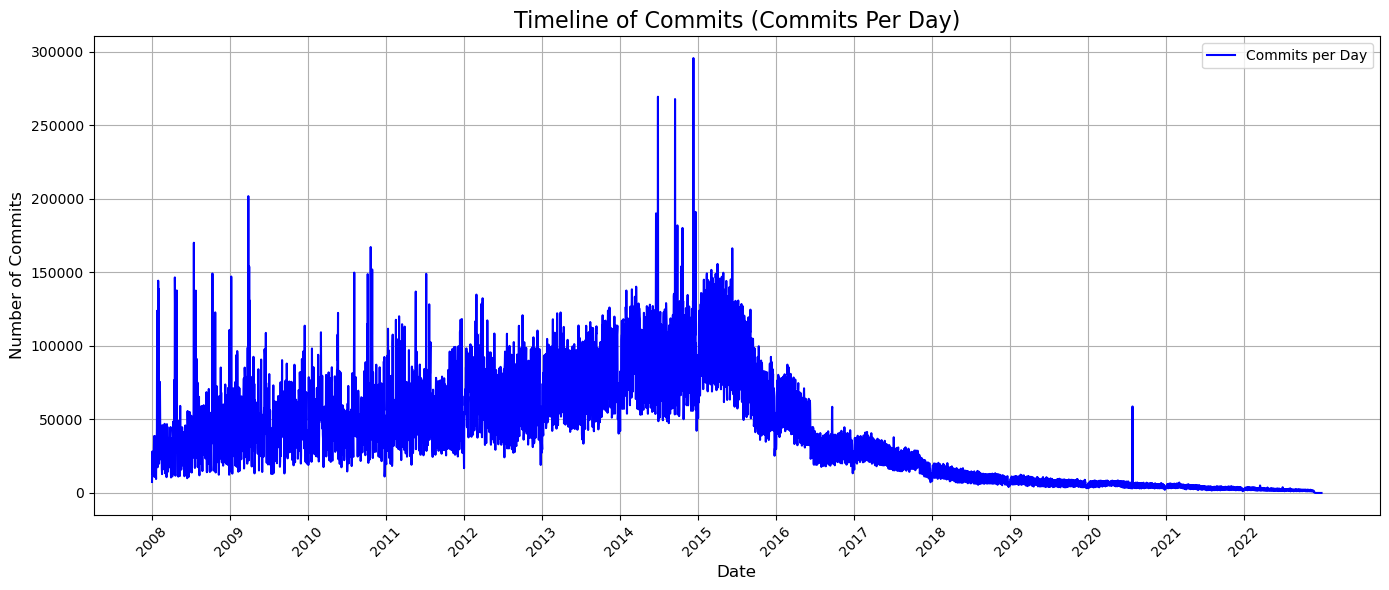

In [ ]:
from pyspark.sql.functions import from_unixtime, to_date, col
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Extract date and truncate to the day level
commits_per_day_df = commits_df.withColumn(
    "commit_date", to_date(from_unixtime(col("author.date.seconds")))
)

# Step 2: Group by commit_date and count the number of commits
daily_commits_df = commits_per_day_df.groupBy("commit_date").count().orderBy("commit_date")

# Step 3: Convert to Pandas for visualization
daily_commits_pd = daily_commits_df.toPandas()

# Step 4: Format the commit_date column to display the year on the x-axis
daily_commits_pd["commit_date"] = pd.to_datetime(daily_commits_pd["commit_date"])

# Step 5: Plot the timeline
plt.figure(figsize=(14, 6))
plt.plot(daily_commits_pd["commit_date"], daily_commits_pd["count"], linestyle="-", color="blue", label="Commits per Day")
plt.title("Timeline of Commits (Commits Per Day)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Commits", fontsize=12)

# Step 6: Label the x-axis with years
year_labels = daily_commits_pd["commit_date"].dt.to_period("Y").drop_duplicates().dt.start_time
plt.xticks(
    ticks=year_labels,
    labels=year_labels.dt.year,
    rotation=45,
    fontsize=10,
)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

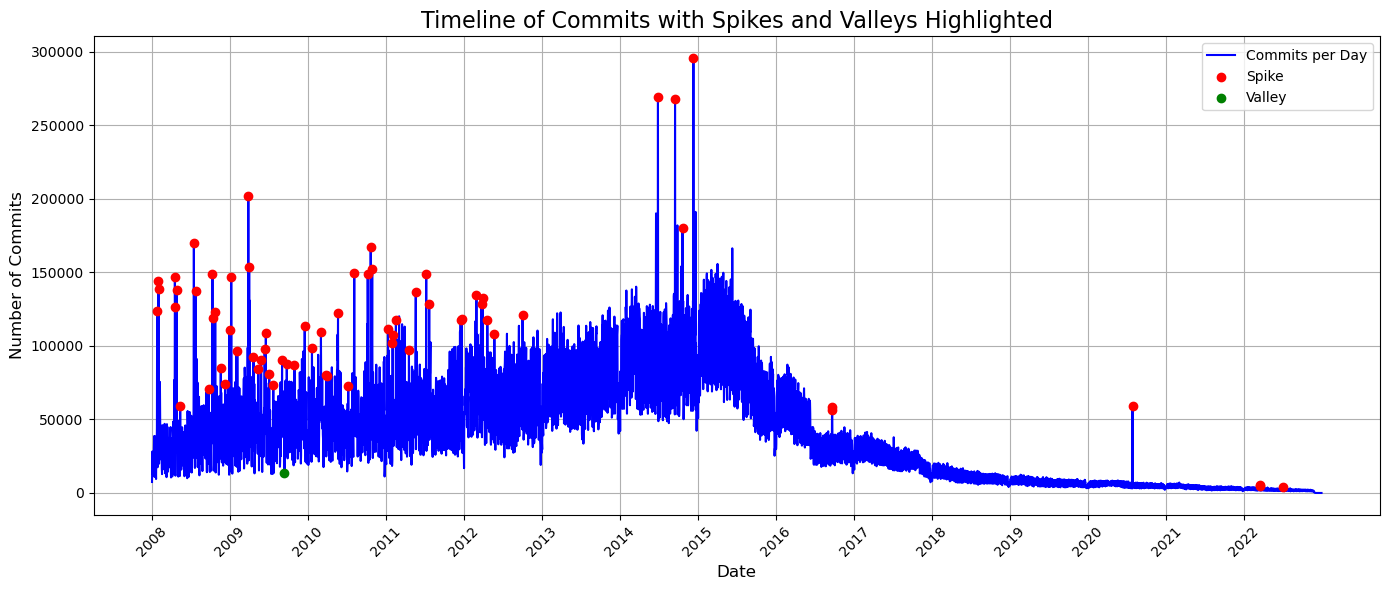

In [26]:
import numpy as np

# Step 1: Calculate rolling mean and standard deviation
rolling_window = 30  # 30-day window
daily_commits_pd["rolling_mean"] = daily_commits_pd["count"].rolling(rolling_window, center=True).mean()
daily_commits_pd["rolling_std"] = daily_commits_pd["count"].rolling(rolling_window, center=True).std()

# Step 2: Define thresholds for spikes and valleys
threshold_factor = 2  # Customize this factor to adjust sensitivity
daily_commits_pd["spike"] = daily_commits_pd["count"] > (daily_commits_pd["rolling_mean"] + threshold_factor * daily_commits_pd["rolling_std"])
daily_commits_pd["valley"] = daily_commits_pd["count"] < (daily_commits_pd["rolling_mean"] - threshold_factor * daily_commits_pd["rolling_std"])

# Step 3: Extract spike and valley data
spikes = daily_commits_pd[daily_commits_pd["spike"]]
valleys = daily_commits_pd[daily_commits_pd["valley"]]

# Step 4: Plot the timeline with spikes and valleys highlighted
plt.figure(figsize=(14, 6))
plt.plot(daily_commits_pd["commit_date"], daily_commits_pd["count"], linestyle="-", color="blue", label="Commits per Day")
plt.scatter(spikes["commit_date"], spikes["count"], color="red", label="Spike", zorder=5)
plt.scatter(valleys["commit_date"], valleys["count"], color="green", label="Valley", zorder=5)

# Formatting the plot
plt.title("Timeline of Commits with Spikes and Valleys Highlighted", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Commits", fontsize=12)
plt.xticks(
    ticks=year_labels,
    labels=year_labels.dt.year,
    rotation=45,
    fontsize=10,
)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
print(f"Total number of spikes: {len(spikes)}")
print(f"Total number of valleys: {len(valleys)}")
print("Dates of top 5 spikes:")
print(spikes.sort_values(by="count", ascending=False).head(10)[["commit_date", "count"]])
print("\nDates of top 5 valleys:")
print(valleys.sort_values(by="count").head(5)[["commit_date", "count"]])

Total number of spikes: 67
Total number of valleys: 1
Dates of top 5 spikes:
     commit_date   count
2535  2014-12-10  295567
2369  2014-06-27  269291
2449  2014-09-15  267707
451   2009-03-27  201718
2484  2014-10-20  180128
196   2008-07-15  170064
1024  2010-10-21  167150
455   2009-03-31  153890
1031  2010-10-28  151909
947   2010-08-05  149751

Dates of top 5 valleys:
    commit_date  count
620  2009-09-12  13281


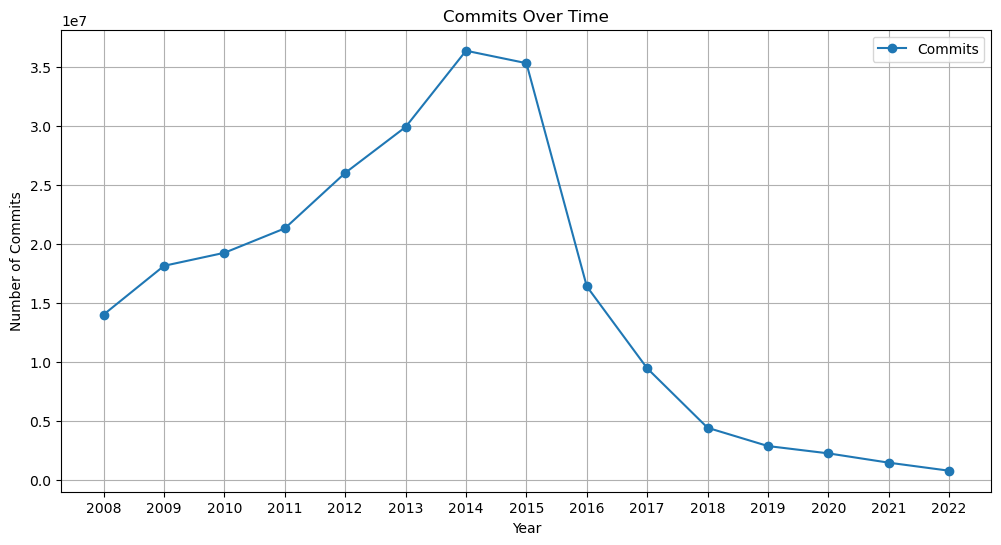

In [17]:
# Convert to Pandas for visualization
timeline_pd = timeline_df.toPandas()
timeline_pd["year"] = timeline_pd["year"].astype(str)

# Plot the timeline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(timeline_pd["year"], timeline_pd["commit_count"], label="Commits", marker="o")
plt.title("Commits Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Commits")
plt.grid()
plt.legend()
plt.show()

# Most Popular Programming Languages

+----------+-------------+
|      name|  total_bytes|
+----------+-------------+
|         C|4969287380614|
|JavaScript|1186897446042|
|       C++| 468310270879|
|       PHP| 396748266060|
|      HTML| 318887666648|
|      Java| 285604561681|
|    Python| 176882264665|
|       CSS| 133134172394|
|        C#| 122274072341|
|  Assembly| 108837886051|
+----------+-------------+
only showing top 10 rows



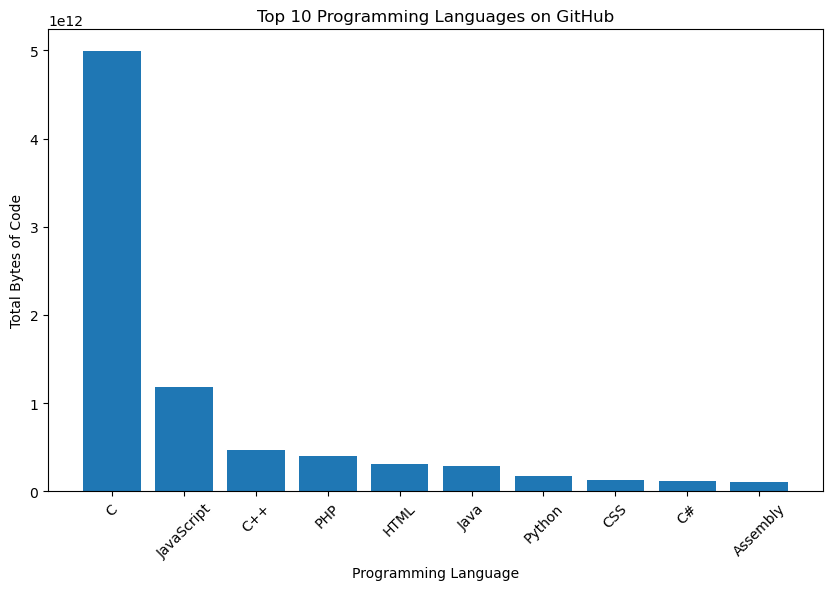

In [17]:
from pyspark.sql.functions import explode, col, sum

# Aggregate the total bytes for each programming language
popular_languages_df = languages_df.groupBy("language.name") \
                                            .agg(sum("language.bytes").alias("total_bytes")) \
                                            .orderBy("total_bytes", ascending=False)

# Show the most popular programming languages
popular_languages_df.show(10)

# Convert to Pandas for visualization
popular_languages_pd = popular_languages_df.limit(10).toPandas()

# Plot the most popular programming languages
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(popular_languages_pd["name"], popular_languages_pd["total_bytes"])
plt.title("Top 10 Programming Languages on GitHub")
plt.xlabel("Programming Language")
plt.ylabel("Total Bytes of Code")
plt.xticks(rotation=45)
plt.show()


In [43]:
language_totals_df = languages_df.groupBy("language.name") \
                                          .agg(sum("language.bytes").alias("total_bytes")) \
                                          .orderBy("total_bytes", ascending=False)

# Step 3: Get the top 10 languages
top_10_languages = [row["name"] for row in language_totals_df.limit(10).collect()]

# Step 4: Filter the original dataframe to keep only the top 10 languages
filtered_languages_df = languages_df.filter(col("language.name").isin(top_10_languages))


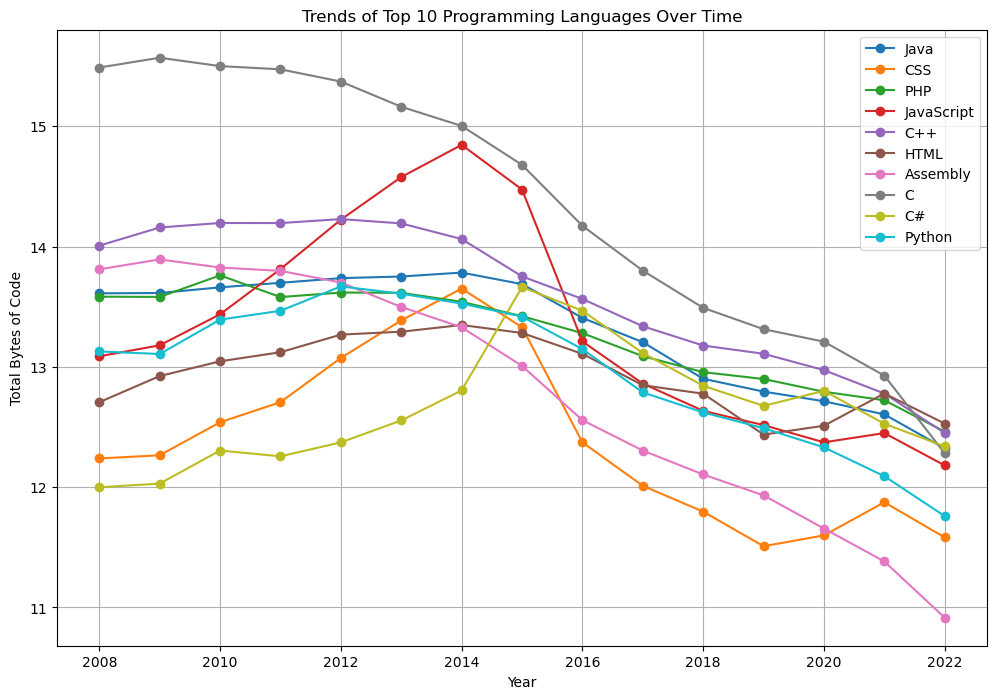

In [ ]:
from pyspark.sql.functions import year, from_unixtime, explode, col, sum
import matplotlib.pyplot as plt
import numpy as np

# Join exploded_languages_df with commits_with_year_df on repo_name

languages_with_year_df = filtered_languages_df.join(commits_df.select("repo_name", "year"), "repo_name")

# Aggregate usage by language and year
language_trends_df = languages_with_year_df.groupBy("language.name", "year") \
                                           .agg(sum(col("language.bytes")).alias("total_bytes")) \
                                           .orderBy("year", "total_bytes", ascending=False)

# Convert to Pandas for plotting
language_trends_pd = language_trends_df.toPandas()
language_trends_pd['log_total_bytes'] = np.log10(language_trends_pd['total_bytes'])

# Plot the trends for the top 5 languages over time
top_languages = language_trends_pd["name"].value_counts().index[:10]
plt.figure(figsize=(12, 8))

for language in top_languages:
    language_data = language_trends_pd[language_trends_pd["name"] == language]
    plt.plot(language_data["year"], language_data["log_total_bytes"], marker="o", label=language)

plt.title("Trends of Top 10 Programming Languages Over Time")
plt.xlabel("Year")
plt.ylabel("Total Bytes of Code")
plt.legend()
plt.grid()
plt.show()


# License Distribution

+------------+----------+
|     license|repo_count|
+------------+----------+
|         mit|   1387021|
|  apache-2.0|    394931|
|     gpl-3.0|    270957|
|     gpl-2.0|    248484|
|bsd-3-clause|    128120|
|bsd-2-clause|     46109|
|    agpl-3.0|     34908|
|   unlicense|     32749|
|    lgpl-3.0|     32118|
|     cc0-1.0|     19419|
+------------+----------+
only showing top 10 rows



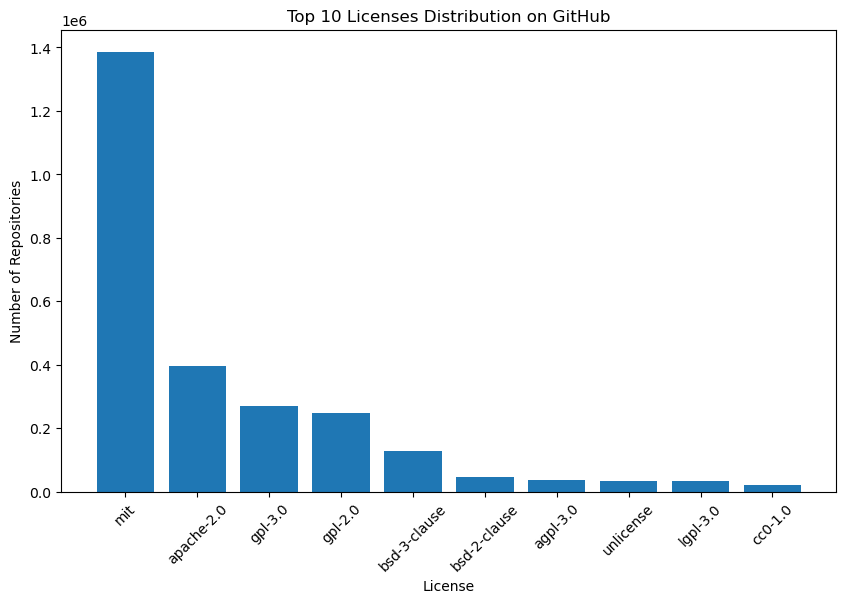

In [27]:
# Group by license and count the number of repositories
license_distribution_df = licenses_df.groupBy("license") \
                                             .count() \
                                             .withColumnRenamed("count", "repo_count") \
                                             .orderBy("repo_count", ascending=False)

# Show the distribution of licenses
license_distribution_df.show(10)

# Convert to Pandas for visualization
license_distribution_pd = license_distribution_df.limit(10).toPandas()

# Plot the distribution of licenses
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(license_distribution_pd["license"], license_distribution_pd["repo_count"])
plt.title("Top 10 Licenses Distribution on GitHub")
plt.xlabel("License")
plt.ylabel("Number of Repositories")
plt.xticks(rotation=45)
plt.show()

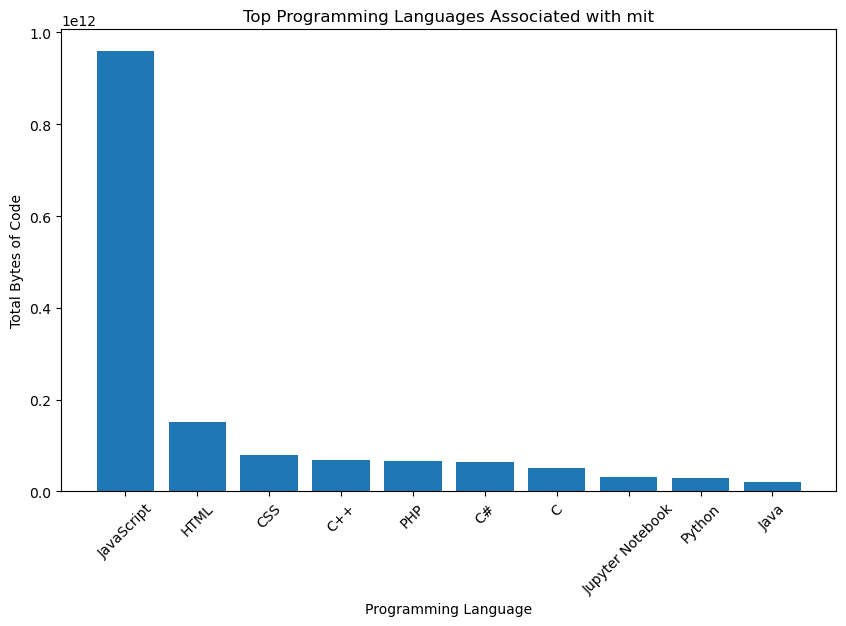

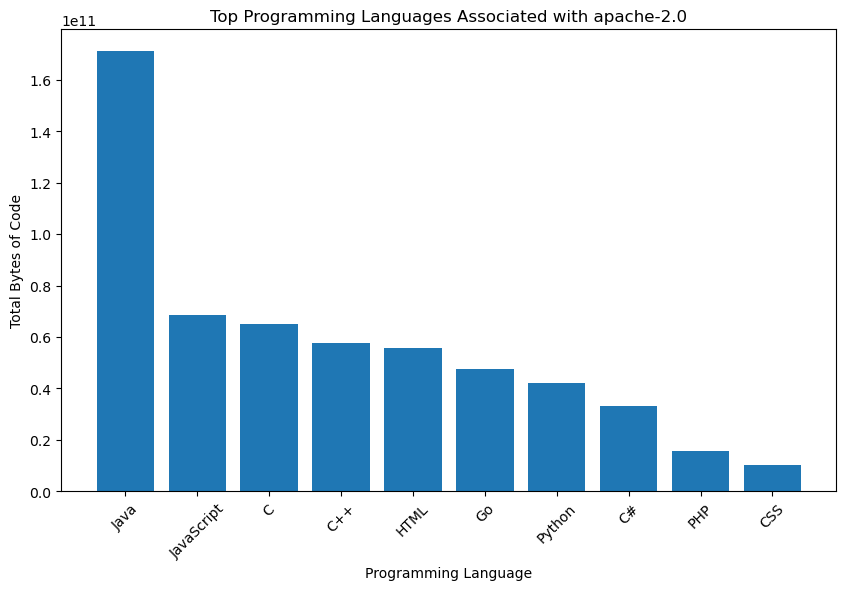

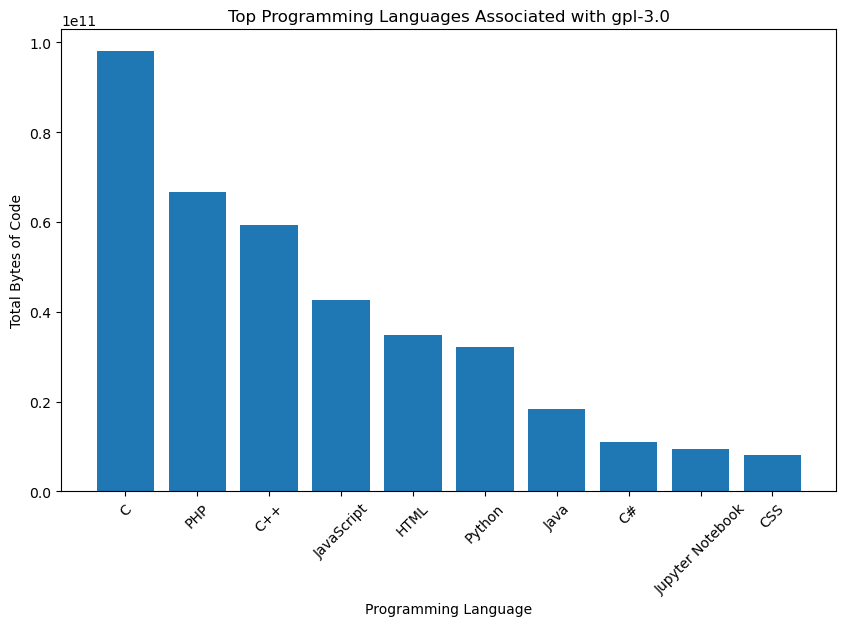

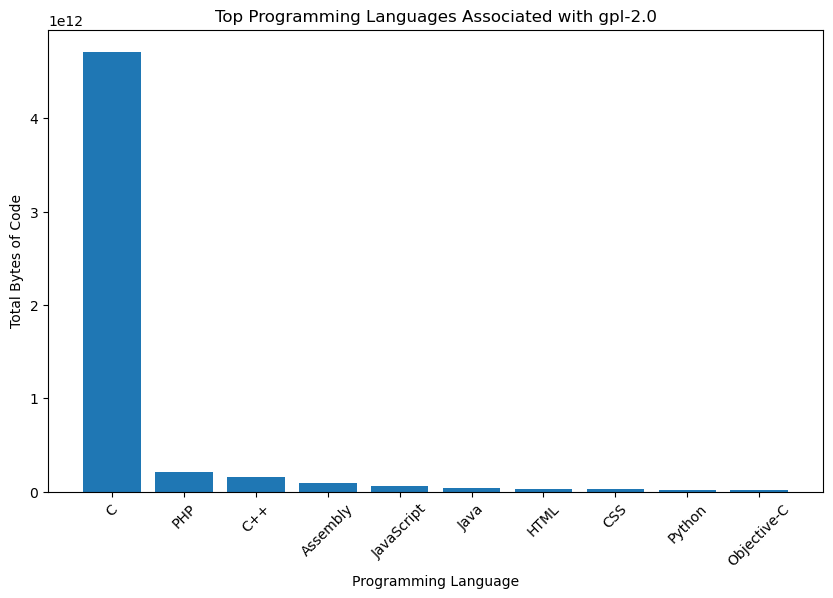

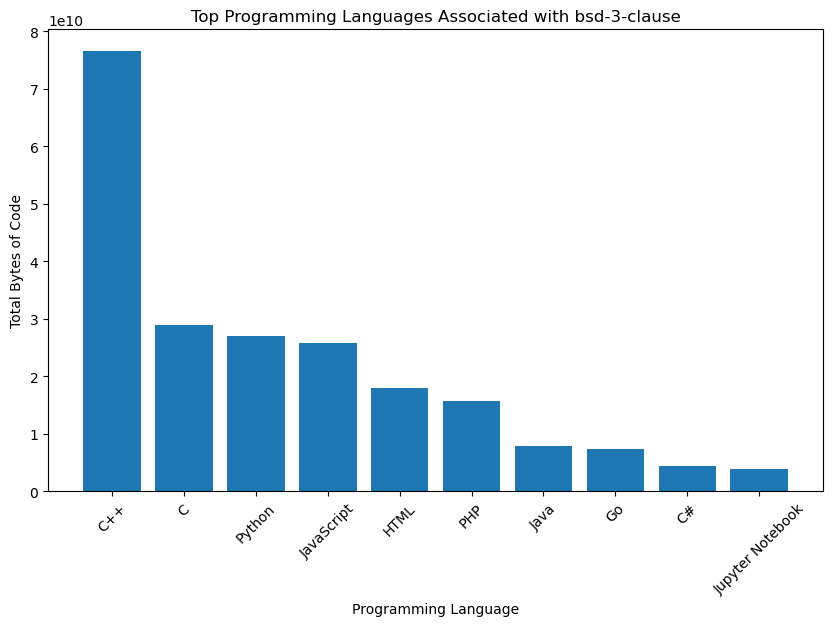

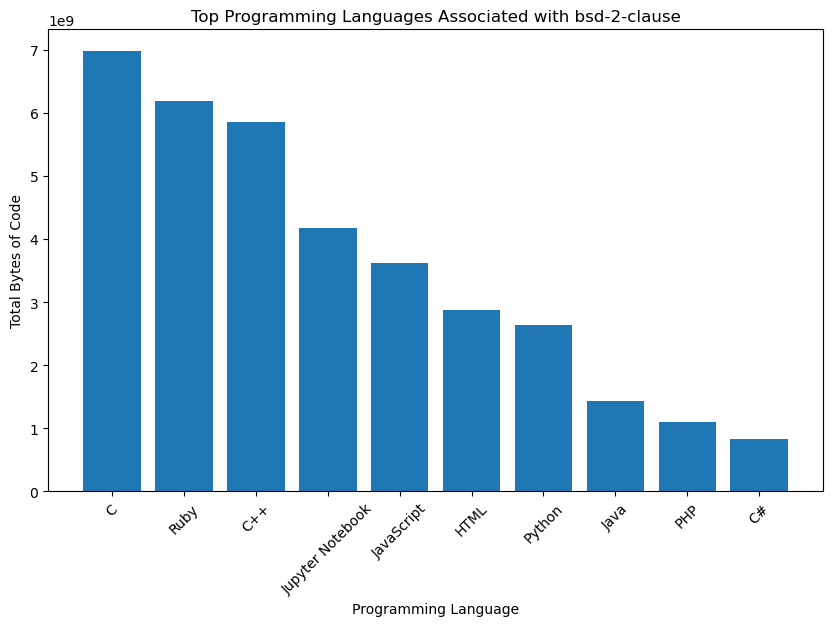

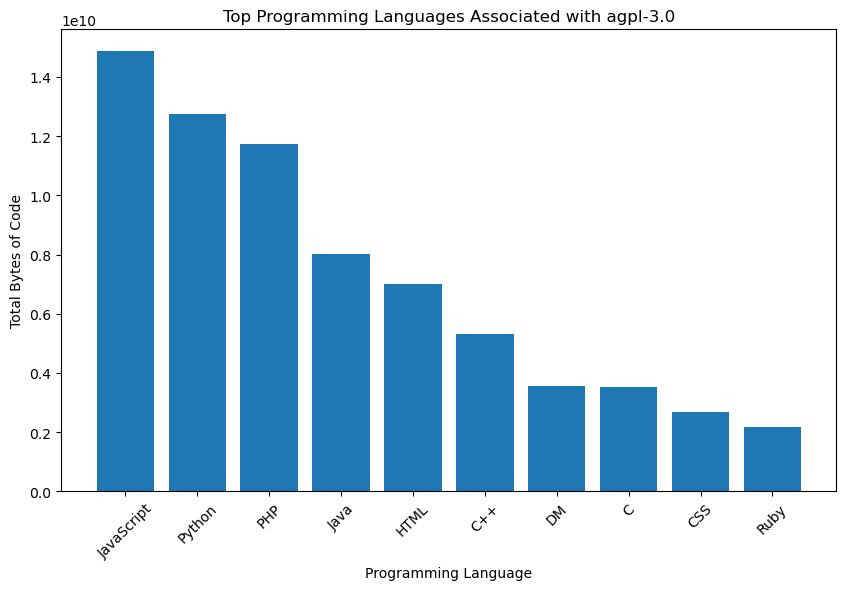

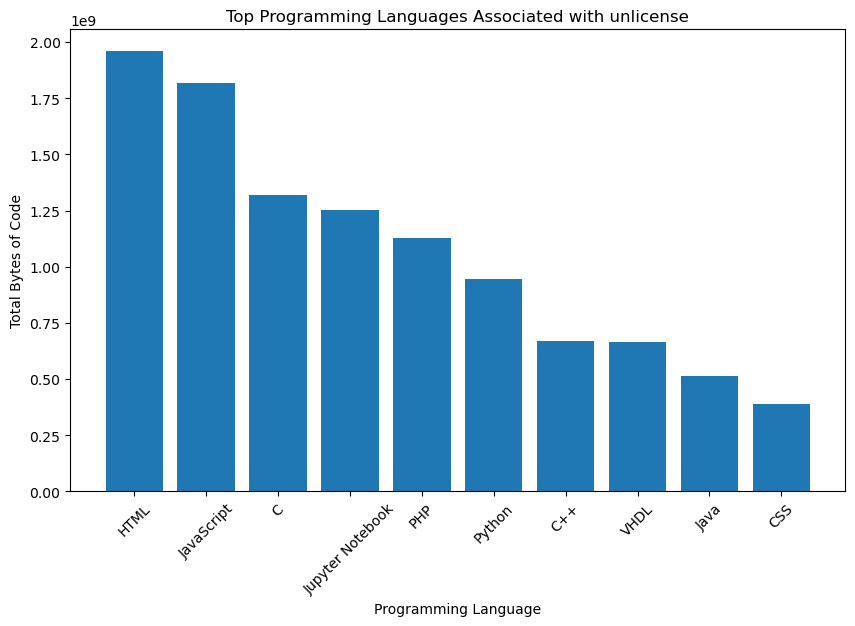

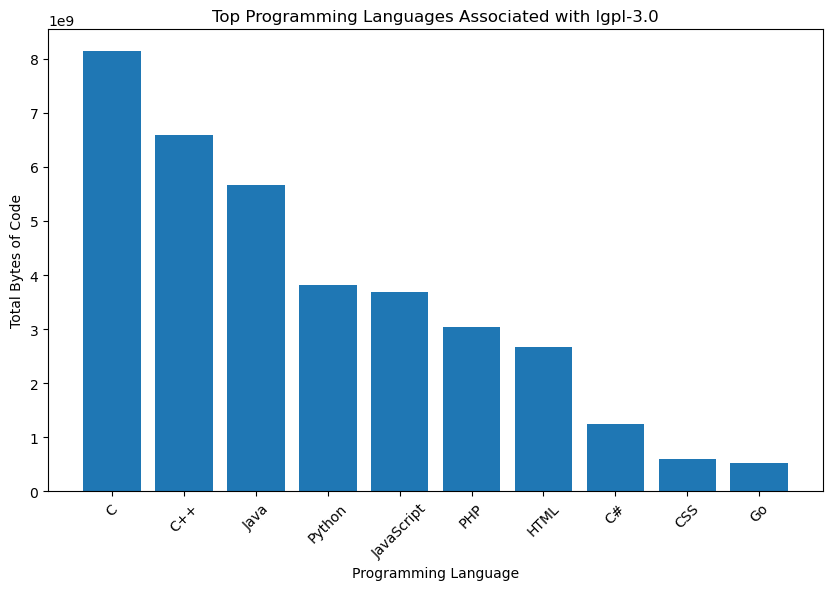

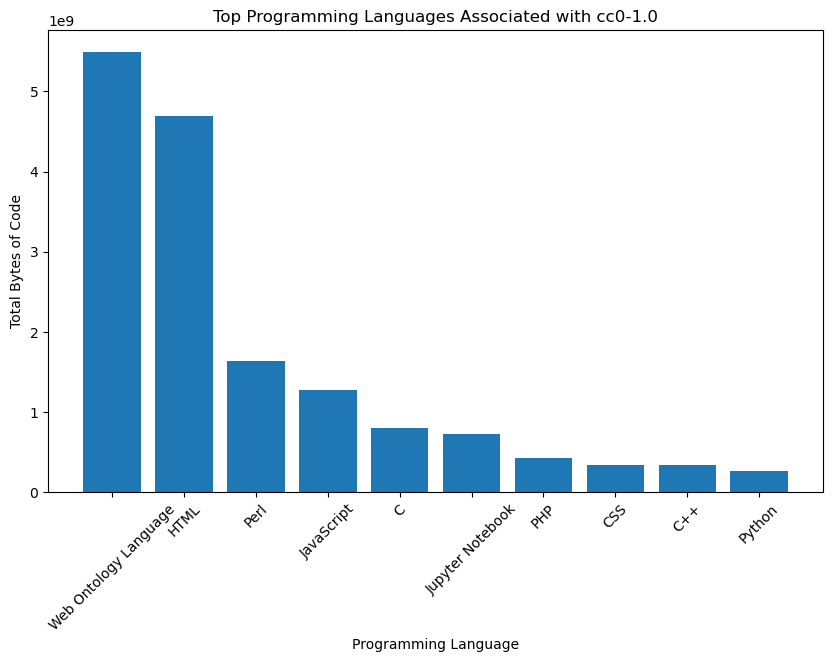

In [28]:
from pyspark.sql.functions import col, explode, sum

# Step 2: Join languages with licenses
languages_with_licenses_df = languages_df.join(licenses_df, "repo_name")

# Step 3: Group by license and programming language to calculate associations
license_language_df = languages_with_licenses_df.groupBy("license", "language.name") \
                                                .agg(sum(col("language.bytes")).alias("total_bytes")) \
                                                .orderBy("license", "total_bytes", ascending=False)

# Step 4: Get the top 10 licenses
top_licenses_df = licenses_df.groupBy("license").count().orderBy("count", ascending=False).limit(10)
top_licenses = [row["license"] for row in top_licenses_df.collect()]

# Step 5: Filter data for the top 10 licenses
filtered_license_language_df = license_language_df.filter(col("license").isin(top_licenses))

# Convert to Pandas for plotting
license_language_pd = filtered_license_language_df.toPandas()

# Step 6: Create a separate plot for each of the top 10 licenses
import matplotlib.pyplot as plt

for license in top_licenses:
    # Filter for the current license and get the top 10 languages
    license_data = license_language_pd[license_language_pd["license"] == license]
    top_languages_for_license = license_data.sort_values(by="total_bytes", ascending=False).head(10)

    # Plot the top programming languages for this license
    plt.figure(figsize=(10, 6))
    plt.bar(top_languages_for_license["name"], top_languages_for_license["total_bytes"])
    plt.title(f"Top Programming Languages Associated with {license}")
    plt.xlabel("Programming Language")
    plt.ylabel("Total Bytes of Code")
    plt.xticks(rotation=45)
    plt.show()

# Most Popular and Rapidly Growing Repositories

+--------------------+-------------+
|           repo_name|total_commits|
+--------------------+-------------+
|   chromium/chromium|        78442|
|     scheib/chromium|        78294|
|   nwjs/chromium.src|        78030|
|google-ar/WebARon...|        77612|
|js0701/chromium-c...|        77582|
|wuhengzhi/chromiu...|        77580|
|was4444/chromium.src|        77580|
|Bysmyyr/chromium-...|        77580|
|ds-hwang/chromium...|        77579|
|heke123/chromium-...|        77579|
+--------------------+-------------+
only showing top 10 rows



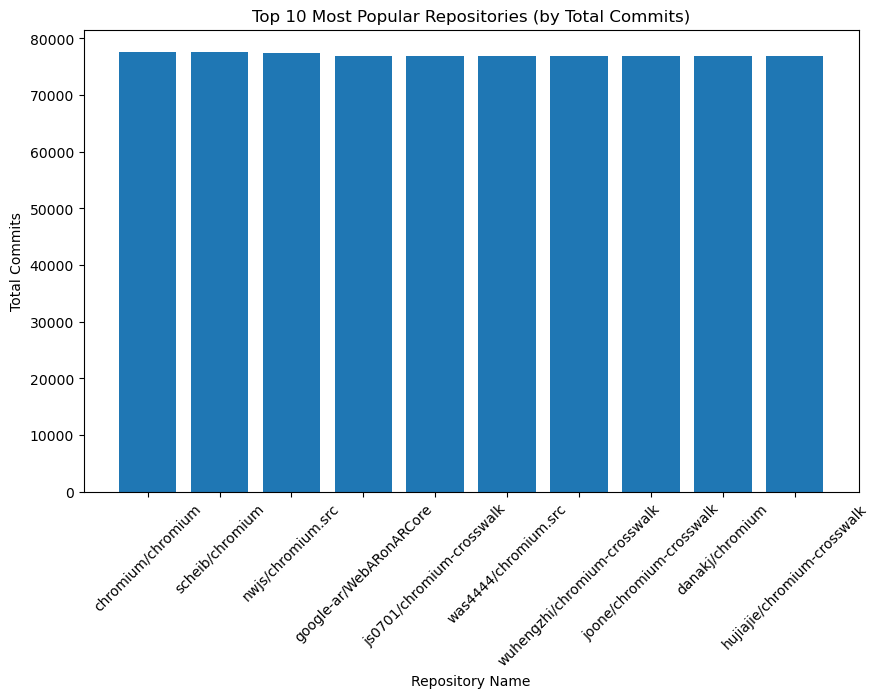

In [29]:
from pyspark.sql.functions import count

popular_repos_df = commits_df.groupBy("repo_name") \
                                     .agg(count("*").alias("total_commits")) \
                                     .orderBy("total_commits", ascending=False)

# Show top 10 most popular repositories
popular_repos_df.show(10)

# Convert to Pandas for further analysis and visualization
popular_repos_pd = popular_repos_df.limit(10).toPandas()

# Plot the most popular repositories
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(popular_repos_pd["repo_name"], popular_repos_pd["total_commits"])
plt.title("Top 10 Most Popular Repositories (by Total Commits)")
plt.xlabel("Repository Name")
plt.ylabel("Total Commits")
plt.xticks(rotation=45)
plt.show()

+--------------------+------+
|           repo_name|growth|
+--------------------+------+
|craigwmcclellan/c...| 36793|
|curtclifton/curtc...| 25305|
|cloudfoundry/reli...| 19227|
|  anirudhSK/chromium| 17262|
|ChromiumWebApps/c...| 17262|
|   miatribe/pipvpspy| 16806|
|was4444/chromium.src| 16183|
|js0701/chromium-c...| 16182|
|   nwjs/chromium.src| 16177|
|google-ar/WebARon...| 16161|
+--------------------+------+
only showing top 10 rows



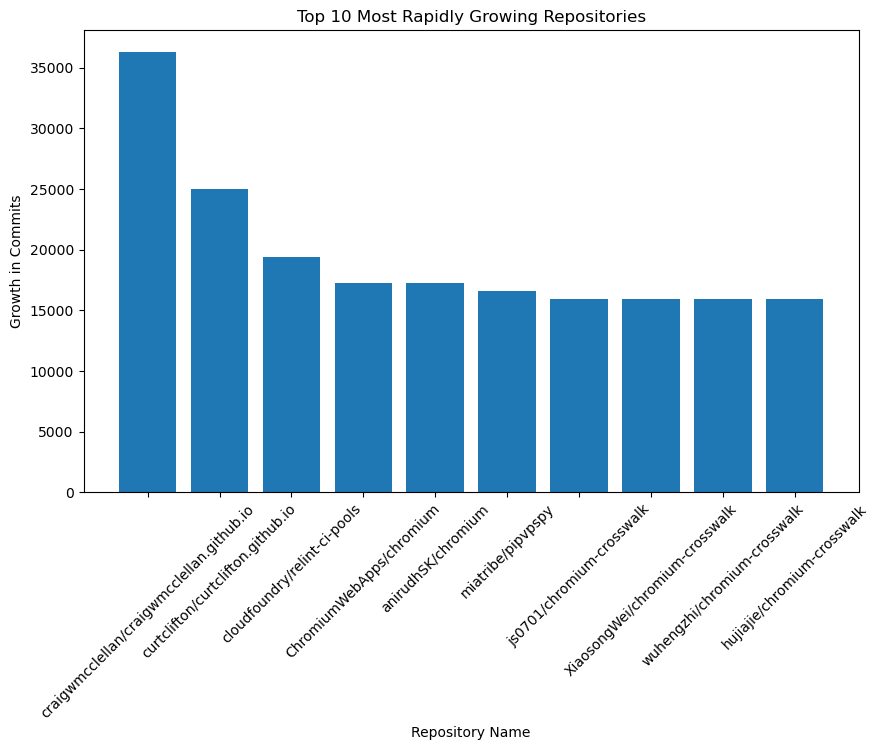

In [ ]:
from pyspark.sql.functions import year, from_unixtime, max, min

# Calculate yearly commit counts for each repository
yearly_commits_df = commits_df.groupBy("repo_name", "year") \
                                        .agg(count("*").alias("yearly_commits"))

# Calculate growth (difference between max and min yearly commits)
repo_growth_df = yearly_commits_df.groupBy("repo_name") \
                                  .agg((max("yearly_commits") - min("yearly_commits")).alias("growth")) \
                                  .orderBy("growth", ascending=False)

# Show top 10 rapidly growing repositories
repo_growth_df.show(10)

# Convert to Pandas for visualization
growth_repos_pd = repo_growth_df.limit(10).toPandas()

# Plot the most rapidly growing repositories
plt.figure(figsize=(10, 6))
plt.bar(growth_repos_pd["repo_name"], growth_repos_pd["growth"])
plt.title("Top 10 Most Rapidly Growing Repositories")
plt.xlabel("Repository Name")
plt.ylabel("Growth in Commits")
plt.xticks(rotation=45)
plt.show()

+-----------+-----------+
|       name|total_bytes|
+-----------+-----------+
|        C++|  400476029|
|          C|   84788390|
| JavaScript|   44132610|
|       HTML|   38302610|
|     Python|   21648881|
|Objective-C|   15272646|
|       Java|   11382808|
| TypeScript|    3120048|
|      Shell|    2632615|
|        CSS|    1920438|
+-----------+-----------+
only showing top 10 rows



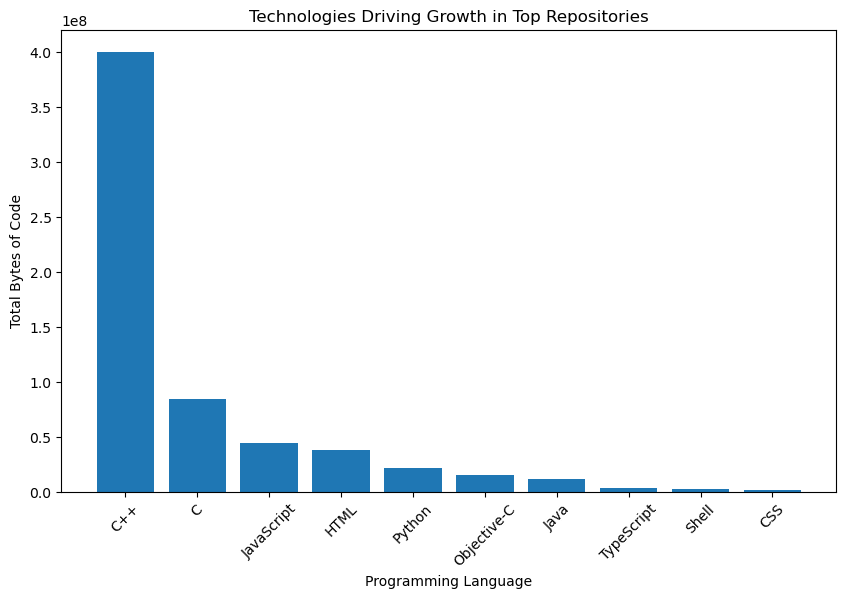

In [32]:
# Join top growing repositories with languages data
top_growing_repos = repo_growth_df.limit(10).select("repo_name")
growing_repo_languages_df = top_growing_repos.join(languages_df, "repo_name")

# Aggregate by programming language
language_growth_df = growing_repo_languages_df.groupBy("language.name") \
                                            .agg(sum("language.bytes").alias("total_bytes")) \
                                            .orderBy("total_bytes", ascending=False)

# Show languages driving growth in rapidly growing repositories
language_growth_df.show(10)

# Convert to Pandas for visualization
language_growth_pd = language_growth_df.limit(10).toPandas()

# Plot the technologies driving growth
plt.figure(figsize=(10, 6))
plt.bar(language_growth_pd["name"], language_growth_pd["total_bytes"])
plt.title("Technologies Driving Growth in Top Repositories")
plt.xlabel("Programming Language")
plt.ylabel("Total Bytes of Code")
plt.xticks(rotation=45)
plt.show()

+--------------------+-------------+
|           repo_name|total_commits|
+--------------------+-------------+
|    Microsoft/vscode|         8564|
|NVIDIA/android-li...|         7125|
|    Microsoft/moodle|         6092|
|  Appled/TrinityCore|         4697|
|Microsoft/TypeScript|         3990|
|     NVIDIA/cuda-gdb|         3216|
|    Microsoft/docker|         3152|
|   GoogleFrog/Zero-K|         1946|
|Microsoft/ChakraCore|         1633|
|Microsoft-CISL/ha...|         1546|
+--------------------+-------------+
only showing top 10 rows



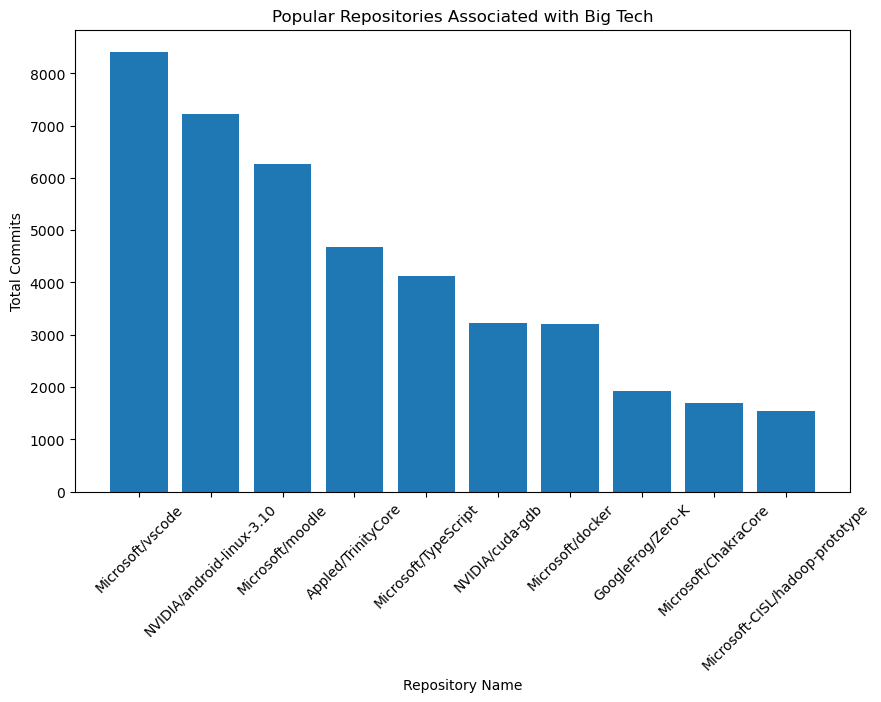

In [34]:
# Define a list of Big Tech companies
big_tech_keywords = ["Google", "Microsoft", "Facebook", "Amazon", "Apple", "Netflix", "NVIDIA"]

# Filter repositories associated with Big Tech
big_tech_repos_df = commits_df.filter(
    col("repo_name").rlike("|".join(big_tech_keywords))
)

# Aggregate by repository to find popular Big Tech repositories
big_tech_popular_df = big_tech_repos_df.groupBy("repo_name") \
                                       .agg(count("*").alias("total_commits")) \
                                       .orderBy("total_commits", ascending=False)

# Show popular repositories associated with Big Tech
big_tech_popular_df.show(10)

# Convert to Pandas for visualization
big_tech_popular_pd = big_tech_popular_df.limit(10).toPandas()

# Plot Big Tech repositories
plt.figure(figsize=(10, 6))
plt.bar(big_tech_popular_pd["repo_name"], big_tech_popular_pd["total_commits"])
plt.title("Popular Repositories Associated with Big Tech")
plt.xlabel("Repository Name")
plt.ylabel("Total Commits")
plt.xticks(rotation=45)
plt.show()

# Technologies most frequently associated with Data Science or AI

In [17]:
from pyspark.sql.functions import col, from_unixtime, to_date, count

# Define Data Science and AI keywords
ds_ai_keywords = ["AI", "ML", "Deep Learning", "Data Science", "Neural Network", 
                  "Machine Learning", "Artificial Intelligence", "Big Data",
                  "Data Mining", "Data Analytics", "Analytics", "Data", "Business Intelligence"]
# Filter commit messages for Data Science and AI-related keywords
ds_ai_commits_df = commits_df.filter(
    col("message").rlike("|".join(ds_ai_keywords)) |
    col("subject").rlike("|".join(ds_ai_keywords))
)

# Aggregate by repository to count commits related to Data Science/AI
ds_ai_repos_df = ds_ai_commits_df.groupBy("repo_name") \
                                 .agg(count("*").alias("ds_ai_commits")) \
                                 .orderBy("ds_ai_commits", ascending=False)

# Show top 10 repositories associated with Data Science/AI
ds_ai_repos_df.show(10)

+--------------------+-------------+
|           repo_name|ds_ai_commits|
+--------------------+-------------+
|comitterman/testrepo|        24134|
|   chromium/chromium|         5220|
|     scheib/chromium|         5218|
|   nwjs/chromium.src|         5208|
|google-ar/WebARon...|         5199|
|ds-hwang/chromium...|         5196|
|js0701/chromium-c...|         5196|
|     danakj/chromium|         5196|
|XiaosongWei/chrom...|         5196|
|joone/chromium-cr...|         5196|
+--------------------+-------------+
only showing top 10 rows



+----------+-------------+
|      name|  total_bytes|
+----------+-------------+
|         C|2856211765349|
|JavaScript| 889810155650|
|       C++| 261031112885|
|      Java| 177362367424|
|       PHP| 105528228876|
|    Python| 102894173181|
|        C#|  91378458542|
|      HTML|  81548286991|
|  Assembly|  62101924426|
|       CSS|  62023405816|
+----------+-------------+
only showing top 10 rows



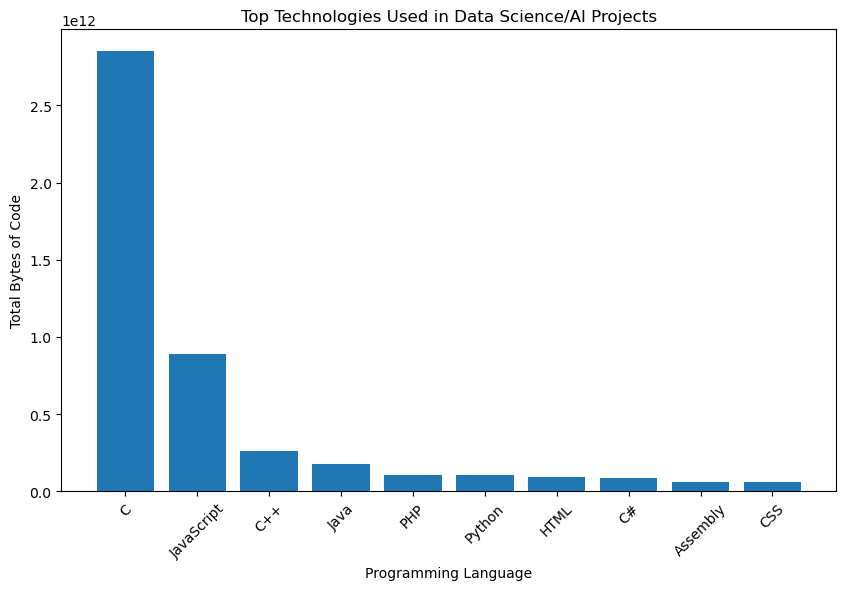

In [18]:
from pyspark.sql.functions import explode

# Join Data Science/AI repositories with their languages
ds_ai_languages_df = ds_ai_repos_df.join(languages_df, "repo_name")

# Aggregate usage by programming language
ds_ai_technologies_df = ds_ai_languages_df.groupBy("language.name") \
                                            .agg(sum("language.bytes").alias("total_bytes")) \
                                            .orderBy("total_bytes", ascending=False)

# Show top programming languages for Data Science/AI
ds_ai_technologies_df.show(10)

# Convert to Pandas for visualization
ds_ai_technologies_pd = ds_ai_technologies_df.limit(10).toPandas()

# Plot the top technologies for Data Science/AI
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(ds_ai_technologies_pd["name"], ds_ai_technologies_pd["total_bytes"])
plt.title("Top Technologies Used in Data Science/AI Projects")
plt.xlabel("Programming Language")
plt.ylabel("Total Bytes of Code")
plt.xticks(rotation=45)
plt.show()

In [21]:
from pyspark.sql.functions import year, from_unixtime, sum as spark_sum

# Step 1: Filter Data Science/AI-related commits
ds_ai_commits_df = commits_df.filter(
    col("message").rlike("|".join(ds_ai_keywords)) | col("subject").rlike("|".join(ds_ai_keywords))
)

# Step 2: Extract year from commit date
ds_ai_commits_df = ds_ai_commits_df.withColumn("year", year(from_unixtime(col("author.date.seconds"))))

# Step 3: Join with languages dataframe
ds_ai_languages_timeline_df = ds_ai_commits_df.join(languages_df, "repo_name")

# Step 4: Aggregate usage by programming language and year
ds_ai_timeline_df = ds_ai_languages_timeline_df.groupBy("language.name", "year") \
    .agg(spark_sum("language.bytes").alias("total_bytes")) \
    .orderBy("year", "language.name")


In [22]:
ds_ai_timeline_df.printSchema()

root
 |-- name: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- total_bytes: long (nullable = true)



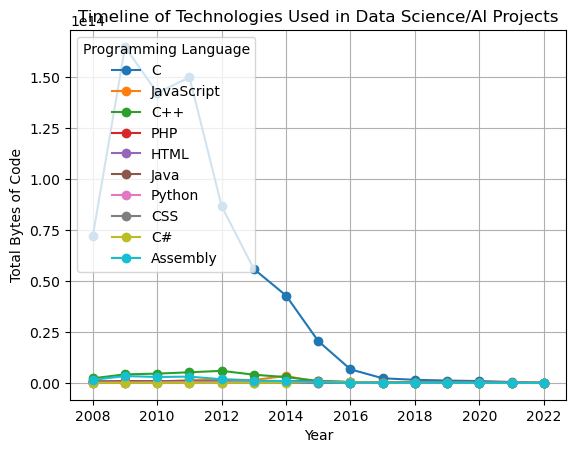

In [27]:
# Step 5: Convert to Pandas for visualization
ds_ai_timeline_pd = ds_ai_timeline_df.toPandas()

# Step 6: Plot the timeline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

language_totals_df = languages_df.groupBy("language.name") \
                                          .agg(sum("language.bytes").alias("total_bytes")) \
                                          .orderBy("total_bytes", ascending=False)


langauge_data['log_total_bytes'] = language_data['total_bytes']

top_10_languages = [row["name"] for row in language_totals_df.limit(10).collect()]

for language in top_10_languages:
    language_data = ds_ai_timeline_pd[ds_ai_timeline_pd["name"] == language]
    plt.plot(
        language_data["year"], 
        language_data["log_total_bytes"], 
        marker="o", 
        label=language
    )

plt.title("Timeline of Technologies Used in Data Science/AI Projects")
plt.xlabel("Year")
plt.ylabel("Total Bytes of Code")
plt.legend(title="Programming Language", loc="upper left")
plt.grid()
plt.show()

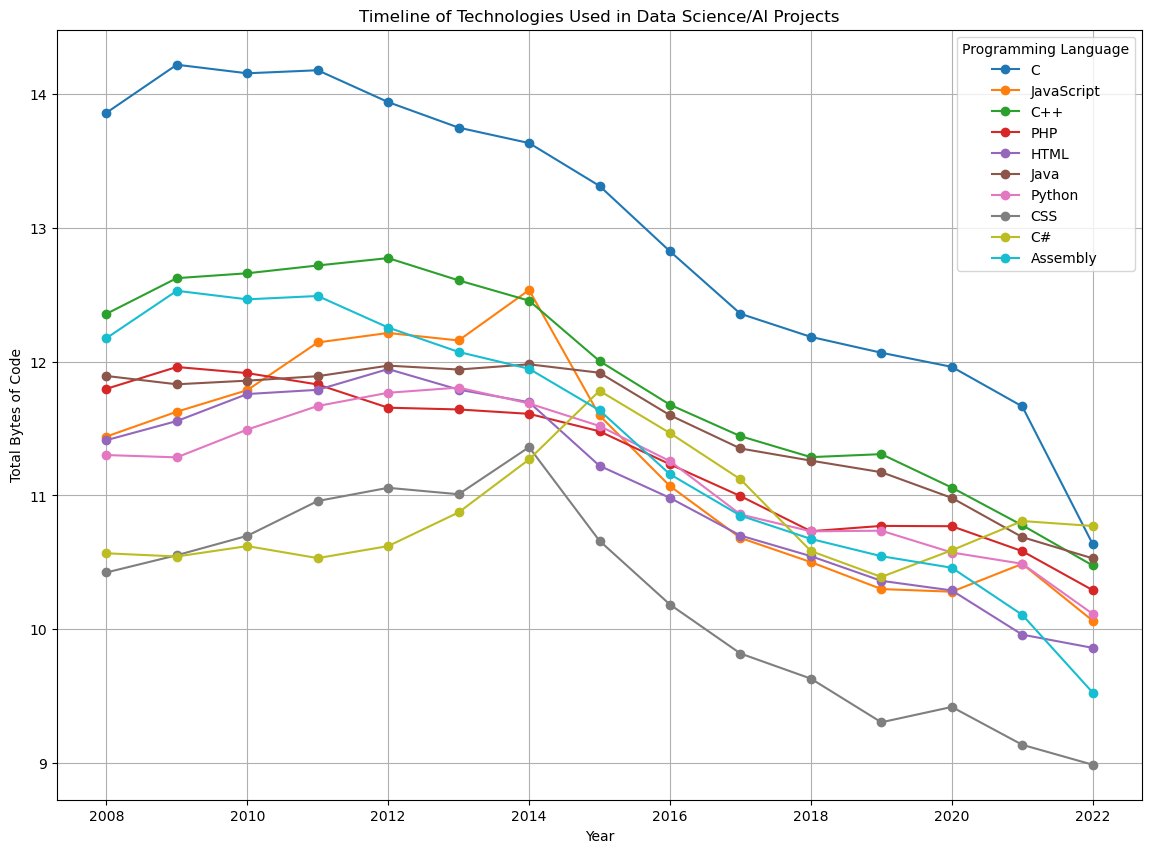

In [33]:
import numpy as np

top_10_languages = [row["name"] for row in language_totals_df.limit(10).collect()]

ds_ai_timeline_pd['log_total_bytes'] = np.log10(ds_ai_timeline_pd['total_bytes'])

plt.figure(figsize=(14, 10))

for language in top_10_languages:
    language_data = ds_ai_timeline_pd[ds_ai_timeline_pd["name"] == language]
    plt.plot(
        language_data["year"], 
        language_data["log_total_bytes"], 
        marker="o", 
        label=language
    )
    
plt.title("Timeline of Technologies Used in Data Science/AI Projects")
plt.xlabel("Year")
plt.ylabel("Total Bytes of Code")
plt.legend(title="Programming Language", loc="upper right")
plt.grid()
plt.show()

# Reasons for Committing

+----------------+---------+
|          reason|    count|
+----------------+---------+
|           Other|132342730|
|         Bug Fix| 55799873|
|Feature Addition| 31704118|
|Code Improvement| 10482829|
|   Documentation|  7246786|
+----------------+---------+



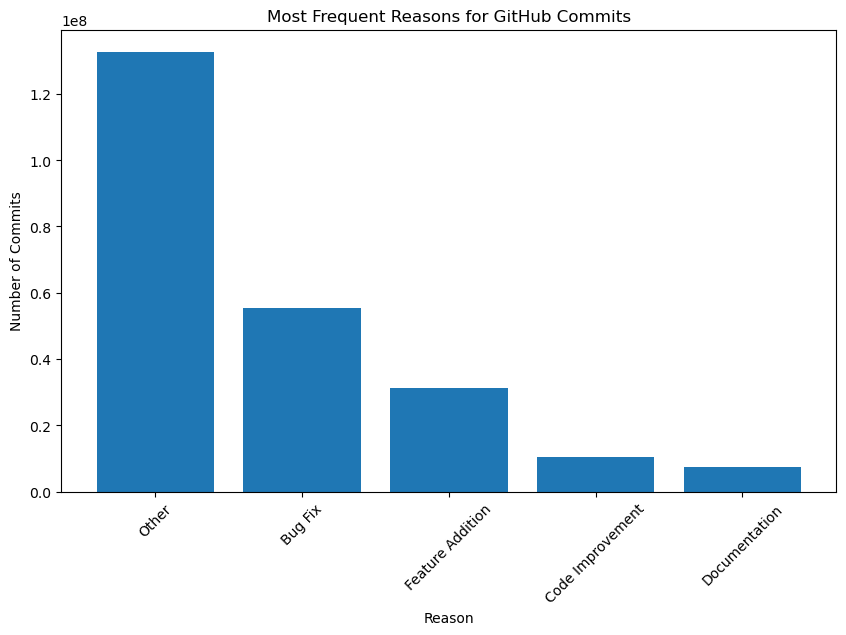

In [16]:
from pyspark.sql.functions import when, col

# Categorize commit messages into reasons
categorized_commits_df = commits_df.withColumn(
    "reason",
    when(col("message").rlike("bug|fix|error|issue|resolve|patch|repair|debug|hotfix|defect|crash"), "Bug Fix")
    .when(col("message").rlike("feature|add|implement|new|create|develop|build|introduce"), "Feature Addition")
    .when(col("message").rlike("update|improve|refactor|enhance|efficient|optimize"), "Code Improvement")
    .when(col("message").rlike("doc|documentation|readme|comment|manual|guide"), "Documentation")
    .otherwise("Other")
)

# Aggregate counts by reason
commit_reason_counts_df = categorized_commits_df.groupBy("reason") \
                                               .count() \
                                               .orderBy("count", ascending=False)

# Show the most frequent reasons for commits
commit_reason_counts_df.show()

# Convert to Pandas for visualization
commit_reason_counts_pd = commit_reason_counts_df.toPandas()

# Plot the distribution of commit reasons
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(commit_reason_counts_pd["reason"], commit_reason_counts_pd["count"])
plt.title("Most Frequent Reasons for GitHub Commits")
plt.xlabel("Reason")
plt.ylabel("Number of Commits")
plt.xticks(rotation=45)
plt.show()

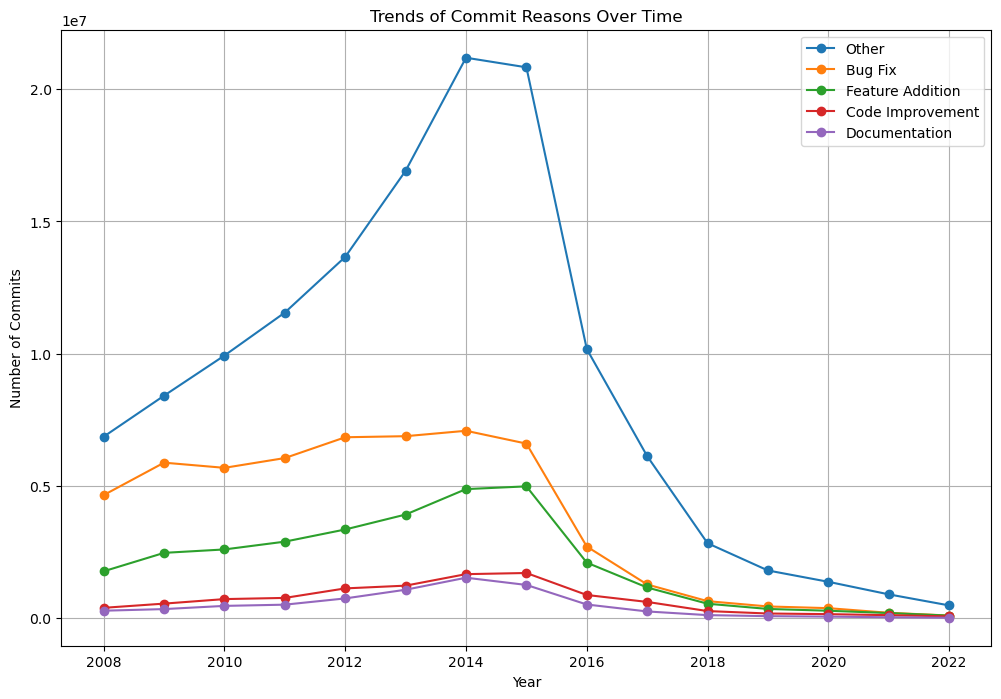

In [ ]:
from pyspark.sql.functions import year, from_unixtime

# Aggregate commit reasons by year
commit_trends_df = categorized_commits_df.groupBy("reason", "year") \
                                                   .count() \
                                                   .withColumnRenamed("count", "commit_count") \
                                                   .orderBy("year", "commit_count", ascending=False)

# Convert to Pandas for visualization
commit_trends_pd = commit_trends_df.toPandas()

# Plot trends for each reason
unique_reasons = commit_reason_counts_pd["reason"].tolist()
plt.figure(figsize=(12, 8))

for reason in unique_reasons:
    reason_data = commit_trends_pd[commit_trends_pd["reason"] == reason]
    plt.plot(reason_data["year"], reason_data["commit_count"], marker="o", label=reason)

plt.title("Trends of Commit Reasons Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Commits")
plt.legend()
plt.grid()
plt.show()

# Most Prolific Committers

+--------------------+------------+
|                name|commit_count|
+--------------------+------------+
|      Linus Torvalds|    11749913|
|     David S. Miller|     3002351|
|        Takashi Iwai|     2021880|
|          Paul Mundt|     1522730|
|         Ingo Molnar|     1521662|
|           Mark Otto|     1430110|
|Bartlomiej Zolnie...|     1411702|
|          Mark Brown|     1121164|
|  Greg Kroah-Hartman|      993392|
|       Roland Walker|      912313|
+--------------------+------------+
only showing top 10 rows



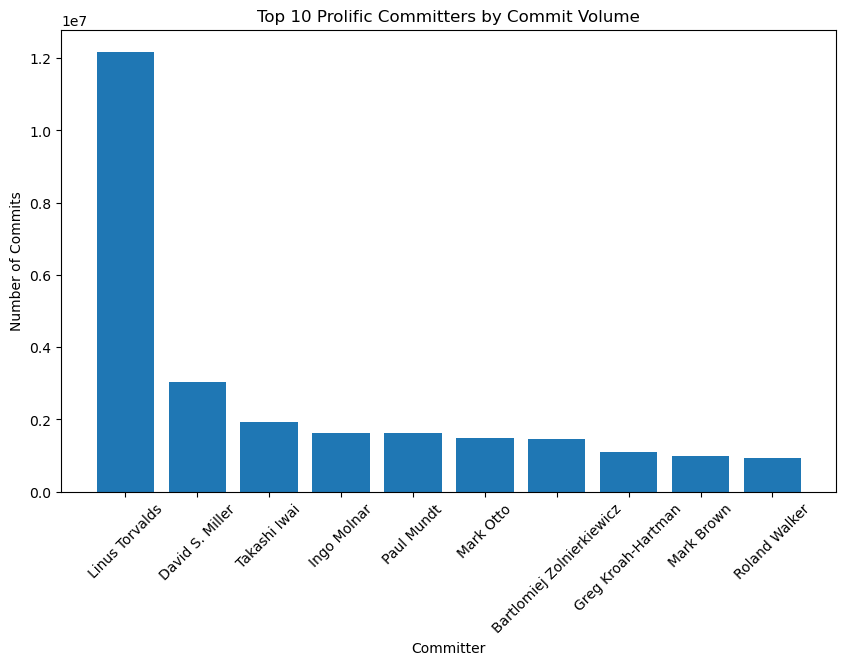

In [42]:
from pyspark.sql.functions import count

# Aggregate commit counts by author
prolific_committers_df = commits_df.groupBy("author.name") \
                                           .agg(count("*").alias("commit_count")) \
                                           .orderBy("commit_count", ascending=False)

# Show the top 10 committers
prolific_committers_df.show(10)

# Convert to Pandas for visualization
prolific_committers_pd = prolific_committers_df.limit(10).toPandas()

# Plot the top 10 prolific committers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(prolific_committers_pd["name"], prolific_committers_pd["commit_count"])
plt.title("Top 10 Prolific Committers by Commit Volume")
plt.xlabel("Committer")
plt.ylabel("Number of Commits")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Convert commit counts to Pandas for distribution analysis
all_commit_counts_pd = prolific_committers_df.toPandas()

# Plot the distribution of commit volumes
plt.figure(figsize=(10, 6))
plt.hist(all_commit_counts_pd["commit_count"], bins=50, color="blue", alpha=0.7)
plt.title("Distribution of Commit Volumes Across Committers")
plt.xlabel("Number of Commits")
plt.ylabel("Number of Committers")
plt.grid()
plt.show()


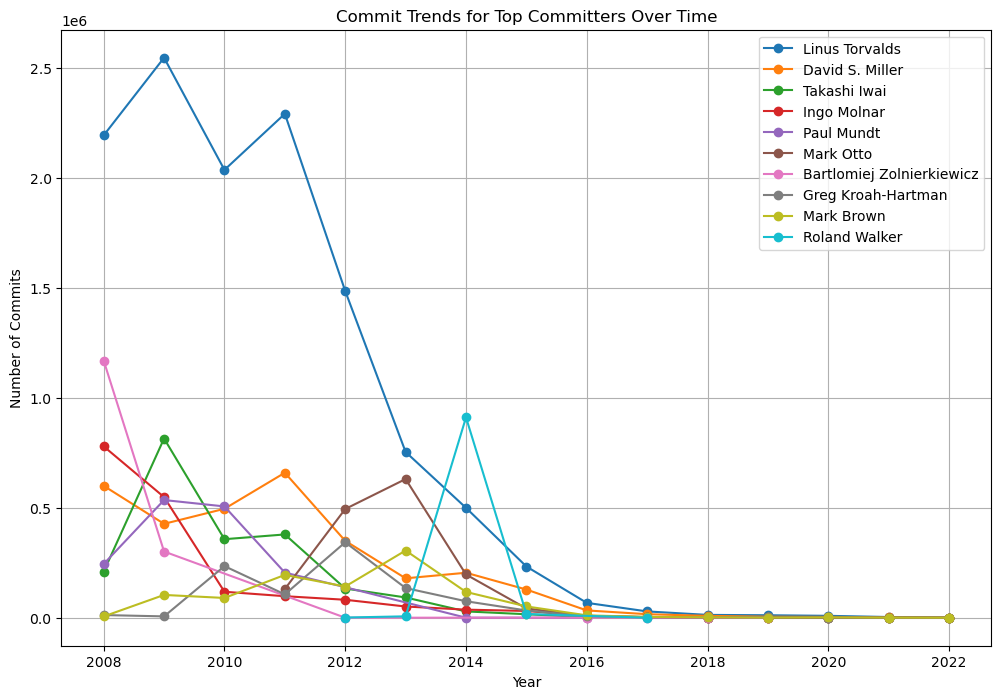

In [43]:
from pyspark.sql.functions import year, from_unixtime

# Filter for top 10 prolific committers
top_committers = prolific_committers_pd["name"].tolist()
top_commits_df = commits_df.filter(col("author.name").isin(top_committers))

# Aggregate commit counts by author and year
commit_trends_df = top_commits_df.groupBy("author.name", "year") \
                                 .agg(count("*").alias("yearly_commits")) \
                                 .orderBy("author.name", "year")

# Convert to Pandas for plotting
commit_trends_pd = commit_trends_df.toPandas()

# Plot trends for each top committer
plt.figure(figsize=(12, 8))
for committer in top_committers:
    committer_data = commit_trends_pd[commit_trends_pd["name"] == committer]
    plt.plot(committer_data["year"], committer_data["yearly_commits"], marker="o", label=committer)

plt.title("Commit Trends for Top Committers Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Commits")
plt.legend()
plt.grid()
plt.show()


In [16]:
from pyspark.sql.functions import count

# Step 1: Aggregate commit counts by author and repository
prolific_committers_repos_df = commits_df.groupBy("author.name", "repo_name") \
    .agg(count("*").alias("commit_count")) \
    .orderBy("commit_count", ascending=False)

# Step 2: Identify the top 10 prolific committers
top_committers_df = commits_df.groupBy("author.name") \
    .agg(count("*").alias("commit_count")) \
    .orderBy("commit_count", ascending=False) \
    .limit(10)

# Convert top committers to a list for filtering
top_committers_list = [row["name"] for row in top_committers_df.collect()]


In [17]:
top_committers_commits_df = commits_df.filter(commits_df["author.name"].isin(top_committers_list))

repos_by_commits_df = top_committers_commits_df.groupBy("repo_name") \
    .agg(count("*").alias("total_commits")) \
    .orderBy("total_commits", ascending=False)

# Step 4: Select the top 10 repositories
top_repositories_df = repos_by_commits_df.limit(10)

# Step 5: Convert to Pandas for visualization
top_repositories_pd = top_repositories_df.toPandas()

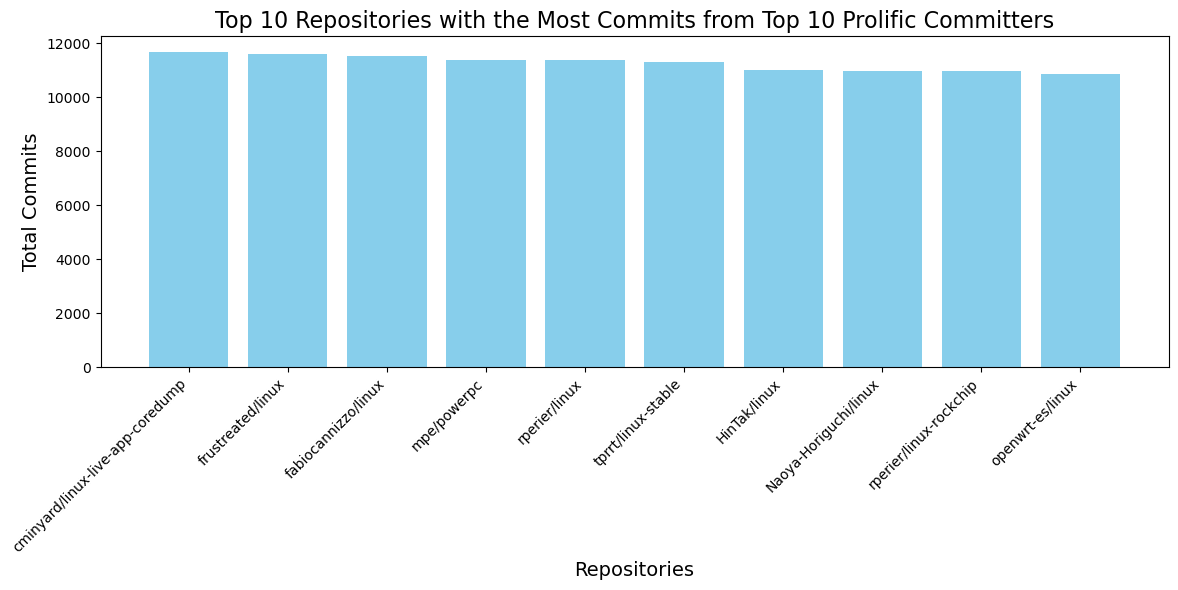

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_repositories_pd["repo_name"], top_repositories_pd["total_commits"], color="skyblue")
plt.title("Top 10 Repositories with the Most Commits from Top 10 Prolific Committers", fontsize=16)
plt.xlabel("Repositories", fontsize=14)
plt.ylabel("Total Commits", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Subject and Message Analysis

In [17]:
from pyspark.sql.functions import col, lower, regexp_replace

# Preprocess subject and message columns
preprocessed_commits_df = commits_df.withColumn("subject_clean", lower(regexp_replace(col("subject"), "[^a-zA-Z0-9\\s]", ""))) \
                                    .withColumn("message_clean", lower(regexp_replace(col("message"), "[^a-zA-Z0-9\\s]", "")))

# Drop rows with null or empty subject or message
preprocessed_commits_df = preprocessed_commits_df.filter((col("subject_clean").isNotNull()) & (col("subject_clean") != "")) \
                                                 .filter((col("message_clean").isNotNull()) & (col("message_clean") != ""))


In [ ]:
from pyspark.ml.feature import Tokenizer, HashingTF, IDF

# Tokenize the subject and message fields
tokenizer_subject = Tokenizer(inputCol="subject_clean", outputCol="subject_tokens")
tokenizer_message = Tokenizer(inputCol="message_clean", outputCol="message_tokens")

tokenized_df = tokenizer_message.transform(tokenizer_subject.transform(preprocessed_commits_df))

# Compute TF-IDF for subject
hashing_tf_subject = HashingTF(inputCol="subject_tokens", outputCol="subject_raw_features", numFeatures=1000)
tf_subject_df = hashing_tf_subject.transform(tokenized_df)

idf_subject = IDF(inputCol="subject_raw_features", outputCol="subject_features")
idf_subject_model = idf_subject.fit(tf_subject_df)
tfidf_subject_df = idf_subject_model.transform(tf_subject_df)

# Compute TF-IDF for message
hashing_tf_message = HashingTF(inputCol="message_tokens", outputCol="message_raw_features", numFeatures=1000)
tf_message_df = hashing_tf_message.transform(tfidf_subject_df)

idf_message = IDF(inputCol="message_raw_features", outputCol="message_features")
idf_message_model = idf_message.fit(tf_message_df)
tfidf_df = idf_message_model.transform(tf_message_df)


In [ ]:
from pyspark.ml.functions import vector_to_array

# Convert feature vectors to arrays
converted_df = tfidf_df.withColumn("subject_dense", vector_to_array(col("subject_features"))) \
                       .withColumn("message_dense", vector_to_array(col("message_features")))


In [ ]:
from pyspark.sql.functions import udf
from pyspark.ml.linalg import Vectors
from pyspark.sql.types import DoubleType
import numpy as np

# Define a UDF to calculate cosine similarity
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    if norm_v1 == 0 or norm_v2 == 0:
        return 0.0
    return float(dot_product / (norm_v1 * norm_v2))

cosine_similarity_udf = udf(cosine_similarity, DoubleType())

# Apply the UDF to compute similarity
similarity_df = converted_df.withColumn(
    "cosine_similarity",
    cosine_similarity_udf(col("subject_dense"), col("message_dense"))
)

# Show the similarity results
similarity_df.select("subject_clean", "message_clean", "cosine_similarity").show(10, truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------+
|subject_clean                                              

In [20]:
similarity_df.printSchema()

root
 |-- commit: string (nullable = true)
 |-- tree: string (nullable = true)
 |-- parent: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- author: struct (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- email: string (nullable = true)
 |    |-- time_sec: long (nullable = true)
 |    |-- tz_offset: long (nullable = true)
 |    |-- date: struct (nullable = true)
 |    |    |-- seconds: long (nullable = true)
 |    |    |-- nanos: long (nullable = true)
 |-- subject: string (nullable = true)
 |-- message: string (nullable = true)
 |-- repo_name: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- subject_clean: string (nullable = true)
 |-- message_clean: string (nullable = true)
 |-- subject_tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- message_tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- subject_raw_features: vector (nullable = true)
 |-- subjec

In [ ]:
from pyspark.sql.functions import when, col

# Add a new column 'similarity_class' based on the cosine similarity threshold
similarity_df = similarity_df.withColumn(
    "similarity_class",
    when(col("cosine_similarity") > 0.7, "similar").otherwise("unique")
)


In [ ]:
similarity_df_sampled = similarity_df.sample(fraction = 0.2, withReplacement = False, seed=42)

24/12/12 18:53:34 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 43 for reason Container marked as failed: container_1734021472082_0001_01_000043 on host: hub-msca-bdp-dphub-students-suyog-sw-17fr.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
24/12/12 18:53:34 WARN org.apache.spark.scheduler.cluster.YarnSchedulerBackend$YarnSchedulerEndpoint: Requesting driver to remove executor 34 for reason Container marked as failed: container_1734021472082_0001_01_000034 on host: hub-msca-bdp-dphub-students-suyog-sw-17fr.c.msca-bdp-students.internal. Exit status: -100. Diagnostics: Container released on a *lost* node.
24/12/12 18:53:34 ERROR org.apache.spark.scheduler.cluster.YarnScheduler: Lost executor 34 on hub-msca-bdp-dphub-students-suyog-sw-17fr.c.msca-bdp-students.internal: Container marked as failed: container_1734021472082_0001_01_000034 on host: hub-msca-bdp-dphub

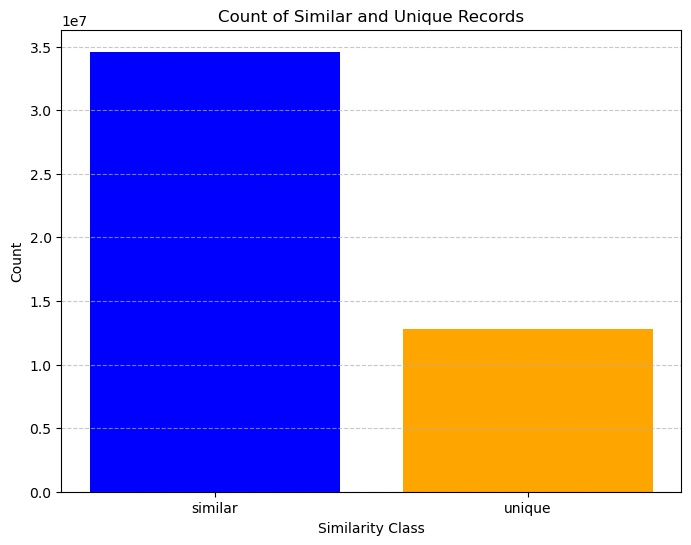

In [ ]:
# Count the number of similar and unique records
similarity_counts = similarity_df_sampled.groupBy("similarity_class").count().toPandas()


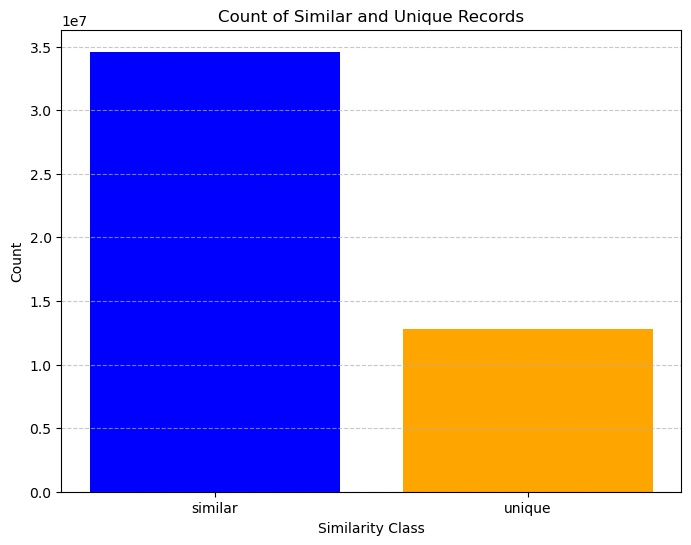

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(similarity_counts["similarity_class"], similarity_counts["count"], color=['blue', 'orange'])
plt.title("Count of Similar and Unique Records")
plt.xlabel("Similarity Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
similarity_pd = similarity_df_sampled.toPandas()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(similarity_pd["cosine_similarity"], bins=10, color="blue", edgecolor="black")
plt.title("Distribution of Cosine Similarity Between Subject and Message")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.grid()
plt.show()

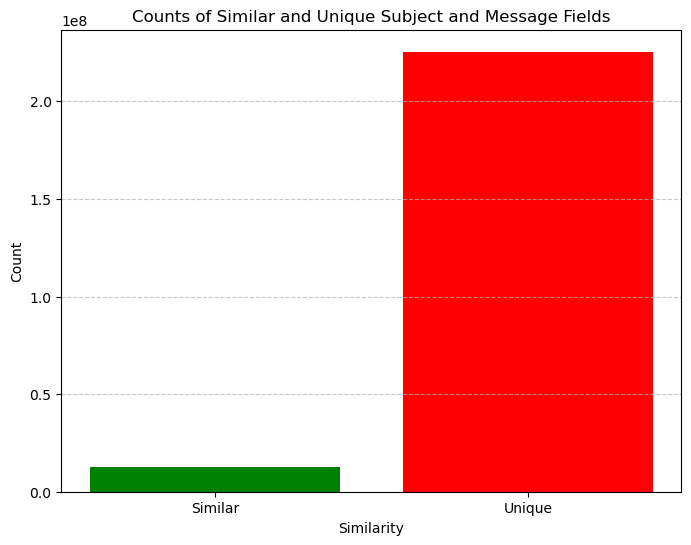

In [16]:
from pyspark.sql.functions import when, col

# Step 1: Add a column to indicate similarity
similarity2_df = commits_df.withColumn(
    "similarity",
    when(col("subject") == col("message"), "Similar").otherwise("Unique")
)

# Step 2: Group by similarity and count
similarity_counts_df = similarity2_df.groupBy("similarity").count()

# Step 3: Convert to Pandas for visualization
similarity_counts_pd = similarity_counts_df.toPandas()

# Step 4: Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(similarity_counts_pd["similarity"], similarity_counts_pd["count"], color=["green", "red"])
plt.title("Counts of Similar and Unique Subject and Message Fields")
plt.xlabel("Similarity")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [44]:
commits_with_languages_df = commits_df.join(languages_df, "repo_name").filter(col("language.name").isin(top_10_languages))


In [55]:
from pyspark.sql.functions import col, lower, regexp_replace

# Preprocess subject and message columns
preprocessed_commits_df2 = commits_with_languages_df.withColumn("subject_clean", lower(regexp_replace(col("subject"), "[^a-zA-Z0-9\\s]", ""))) \
                                    .withColumn("message_clean", lower(regexp_replace(col("message"), "[^a-zA-Z0-9\\s]", "")))

# Drop rows with null or empty subject or message
preprocessed_commits_df2 = preprocessed_commits_df2.filter((col("subject_clean").isNotNull()) & (col("subject_clean") != "")) \
                                                 .filter((col("message_clean").isNotNull()) & (col("message_clean") != ""))


In [ ]:
from pyspark.ml.feature import Tokenizer, HashingTF, IDF
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import udf

# Tokenize and vectorize
tokenizer = Tokenizer(inputCol="subject_clean", outputCol="subject_tokens")
preprocessed_commits_df2 = tokenizer.transform(preprocessed_commits_df2)

tokenizer = Tokenizer(inputCol="message_clean", outputCol="message_tokens")
preprocessed_commits_df2 = tokenizer.transform(preprocessed_commits_df2)

hashing_tf = HashingTF(inputCol="subject_tokens", outputCol="subject_raw_features")
preprocessed_commits_df2 = hashing_tf.transform(preprocessed_commits_df2)

hashing_tf = HashingTF(inputCol="message_tokens", outputCol="message_raw_features")
preprocessed_commits_df2 = hashing_tf.transform(preprocessed_commits_df2)

idf = IDF(inputCol="subject_raw_features", outputCol="subject_features")
idf_model = idf.fit(preprocessed_commits_df2)
preprocessed_commits_df2 = idf_model.transform(preprocessed_commits_df2)

idf = IDF(inputCol="message_raw_features", outputCol="message_features")
idf_model = idf.fit(preprocessed_commits_df2)
preprocessed_commits_df2 = idf_model.transform(preprocessed_commits_df2)

In [58]:
from pyspark.ml.linalg import DenseVector
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col, lit, when

def cosine_similarity(vec1, vec2):
    dot_product = float(vec1.dot(vec2))
    magnitude = float(vec1.norm(2) * vec2.norm(2))
    if magnitude == 0:
        return 0.0
    return dot_product / magnitude

cosine_similarity_udf = udf(cosine_similarity, DoubleType())

preprocessed_commits_df2 = preprocessed_commits_df2.withColumn(
    "cosine_similarity",
    cosine_similarity_udf(col("subject_features"), col("message_features"))
)

# Step 4: Classify as 'similar' or 'unique'
preprocessed_commits_df2 = preprocessed_commits_df2.withColumn(
    "similarity_class",
    when(col("cosine_similarity") > 0.7, lit("similar")).otherwise(lit("unique"))
)

In [ ]:
similarity_counts = preprocessed_commits_df2.groupBy("language.name", "similarity_class") \
                                             .count() \
                                             .toPandas()

24/12/13 01:50:14 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 8.1 MiB
24/12/13 04:05:13 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 8.1 MiB


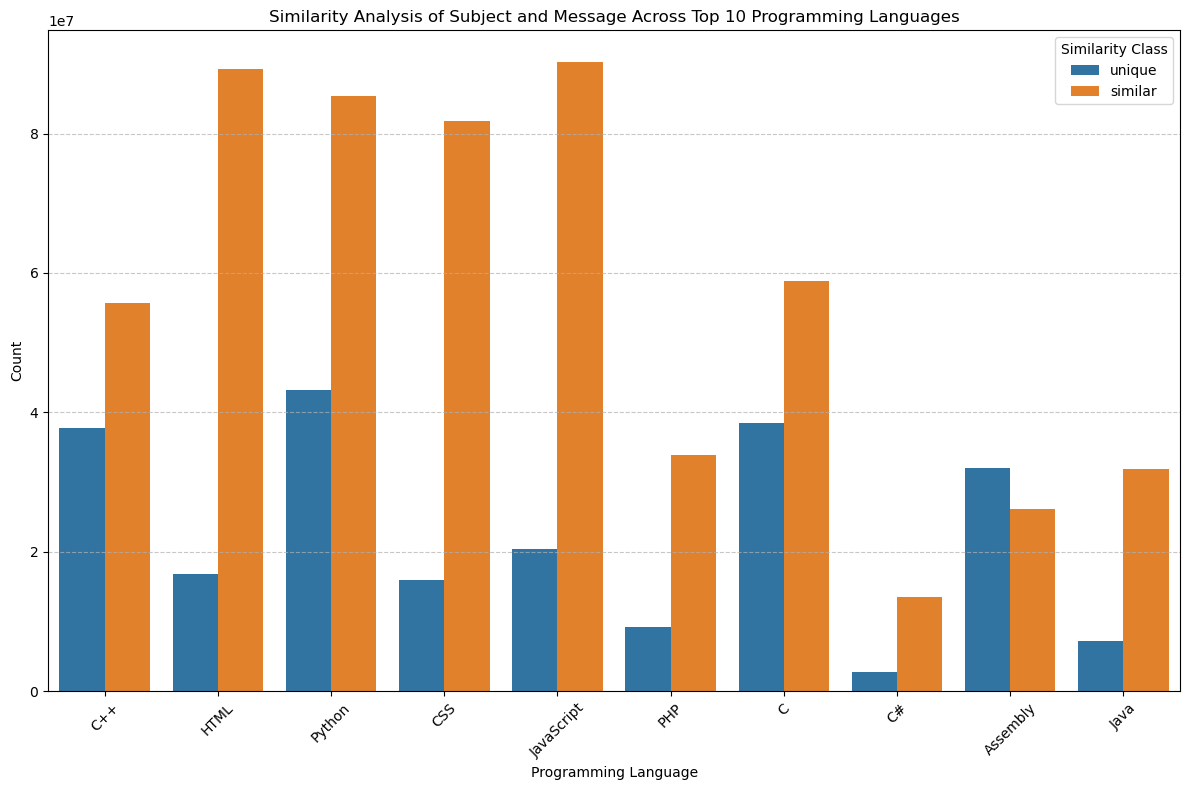

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=similarity_counts, x="name", y="count", hue="similarity_class")
plt.title("Similarity Analysis of Subject and Message Across Top 10 Programming Languages")
plt.xlabel("Programming Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Similarity Class")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()